### Exploratory Data Analysis
#### Author: `Larysa Vasylenko`

This data analysis looks at information taken from personal Telegram activity to find interesting **patterns in communication** and gain insights related to social behavior. By studying messages, conversations, and interactions in private and group chats, the goal is to understand how people communicate, what they prefer, and explore any social trends that might appear.

#### Goals of the Research:

- **Personal Behavioral Patterns**: analyze the frequency, topics, and trends of interactions over time to identify how communication evolves in different contexts.

- **Social Psychology Insights**: Complement the analysis with relevant insights from social psychology, providing references to established studies that offer explanations for observed results on the charts. These references help interpret patterns, such as communication preferences, social group dynamics, and gendered interactions, within a broader psychological framework.

- **Data-Driven Decision Making**: use data visualization and advanced processing techniques, such as natural language processing (NLP) and TF-IDF analysis, to quantify interaction trends and evaluate personal priorities.

### Table of Contents

#### Telegram activity analysis
1. [What percentage of messages are sent in private chats & groups?](#What-percentage-of-messages-are-sent-in-private-chats-&-groups?)
2. [How does my activity (messages sent by me) on Telegram change over time?](#How-does-my-activity-(messages-sent-by-me)-on-Telegram-change-over-time?)
3. [How does my Telegram activity change per day of the week?](#How-does-my-Telegram-activity-change-per-day-of-the-week?)
4. [How does my Telegram activity change per time of the day?](#How-does-my-Telegram-activity-change-per-time-of-the-day?)
#### Phone numbers analysis
5. [Analysis of the tendency to share phone numbers on Telegram](#Analysis-of-the-tendency-to-share-phone-numbers-on-Telegram)

#### Emoji usage
6. [Which emojis do I use most frequently in my messages?](#Which-emojis-do-I-use-most-frequently-in-my-messages?)
7. [Chrono-Emotional Analysis: emoji categories and their dominance by hour of the day](#Chrono-Emotional-Analysis:-emoji-categories-and-their-dominance-by-hour-of-the-day)

[Dataframe merging](#Dataframe-merging)

#### Event oriented

8. [How does the number of received messages сhange on my Birthday?](#topic)

#### Communication session duration analysis
9. [Distribution of communication sessions and their duration](#Distribution-of-communication-sessions-and-their-duration)
10. [Distribution of the average communication session duration and chat names](#Distribution-of-the-average-communication-session-duration-and-chat-names)
11. [Distribution of the average communication session duration by the category of the chat](#Distribution-of-the-average-communication-session-duration-by-the-category-of-the-chat)
12. [Distribution of the average communication session duration by the gender](#Distribution-of-the-average-communication-session-duration-by-the-gender)
13. [How the average (weekly) communication session duration by the gender change over time?](#How-the-average-(weekly)-communication-session-duration-by-the-gender-change-over-time?)
14. [Analysis of session duration trends in the largest private chat](#Analysis-of-session-duration-trends-in-the-largest-private-chat)

#### Sleep duration based on Telegram activity
15. [Analysis of weekly average sleep duration (weekly) based on Telegram activity](#Analysis-of-weekly-average-sleep-duration-(weekly)-based-on-Telegram-activity)
16. [Most frequently sent last messages of the day](#Most-frequently-sent-last-messages-of-the-day)

#### Message length analysis
17. [Analysis of the average message length sent in 2024](#Analysis-of-the-average-message-length-sent-in-2024)

#### Telegram group chat analysis
18. [Analysis of the largest groups by number of users](#Analysis-of-the-largest-groups-by-number-of-users)
19. [Top groups I write the most messages to](#Top-groups-I-write-the-most-messages-to)
20. [My activity in group chats over time](#My-activity-in-group-chats-over-time)
21. [Analysis of the most active Telegram groups by weekly engagement](#Analysis-of-the-most-active-Telegram-groups-by-weekly-engagement)

#### Telegram channel analysis
22. [Channel Categorization by Themes](#Channel-Categorization-by-Themes)

#### Analysis of categorized chats by gender
23. [Do I communicate more with women or men? (by categorized chats)](#Do-I-communicate-more-with-women-or-men?-(by-categorized-chats))
24. [How does the trend of communication (by gender) change over time?](#How-does-the-trend-of-communication-(by-gender)-change-over-time?)

#### NLP (for Analyzing Communication Patterns)
25. [Most frequently used words in messages (after lemmatization and another preprocessing)](#Most-frequently-used-words-in-messages-(after-lemmatization-and-another-preprocessing))

[TF-IDF](#TF-IDF-value)

26. [Analyzing the Most Significant Words in Private Conversations Using TF-IDF](#Analyzing-the-Most-Significant-Words-in-Private-Conversations-Using-TF-IDF)
27. [Comparison of Top Words by Average TF-IDF Score: Messages Sent by Me vs. Messages Received](#Comparison-of-Top-Words-by-Average-TF-IDF-Score:-Messages-Sent-by-Me-vs.-Messages-Received)

In [1]:
import pandas as pd
import os
import pandas as pd
import numpy as np
import json
import re
import matplotlib.pyplot as plt
from pywaffle import Waffle
from matplotlib.patches import Patch
from telethon.tl.types import ReactionEmoji
from collections import Counter
import plotly.graph_objects as go
from collections import defaultdict
from plotly.subplots import make_subplots
import plotly.express as px
from plotly.graph_objects import Bar
import plotly.subplots as sp
from datetime import datetime, timedelta
from collections import Counter

In [2]:
file_path = 'final_data/final_data_meta.csv'
df_meta = pd.read_csv(file_path)

In [3]:
file_path = 'final_data/final_data.csv'
df = pd.read_csv(file_path)

C:\Users\User\AppData\Local\Temp\ipykernel_20236\4278006256.py:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [4]:
df_meta.shape

(2962, 8)

In [5]:
df.shape

(1262176, 10)

## Telegram activity analysis

### What percentage of messages are sent in private chats & groups? 

In [7]:
#private chats
sent_by_me = df[df['from_id'] == my_id] #all my messages in private chats/groups
private_chats_df_meta = df_meta[df_meta['type'] == 'Private dialog']
my_prm_df = sent_by_me[sent_by_me['dialog_id'].isin(private_chats_df_meta['dialog_id'])]
count_m = my_prm_df.shape[0] #count of all of my messages in private chats
count_m

113018

In [8]:
#groups
groups_df_meta = df_meta[df_meta['type'] == 'Group']
my_gm_df = sent_by_me[sent_by_me['dialog_id'].isin(groups_df_meta['dialog_id'])]
count_gm = my_gm_df.shape[0] #count of all of my messages in groups
count_gm

2900

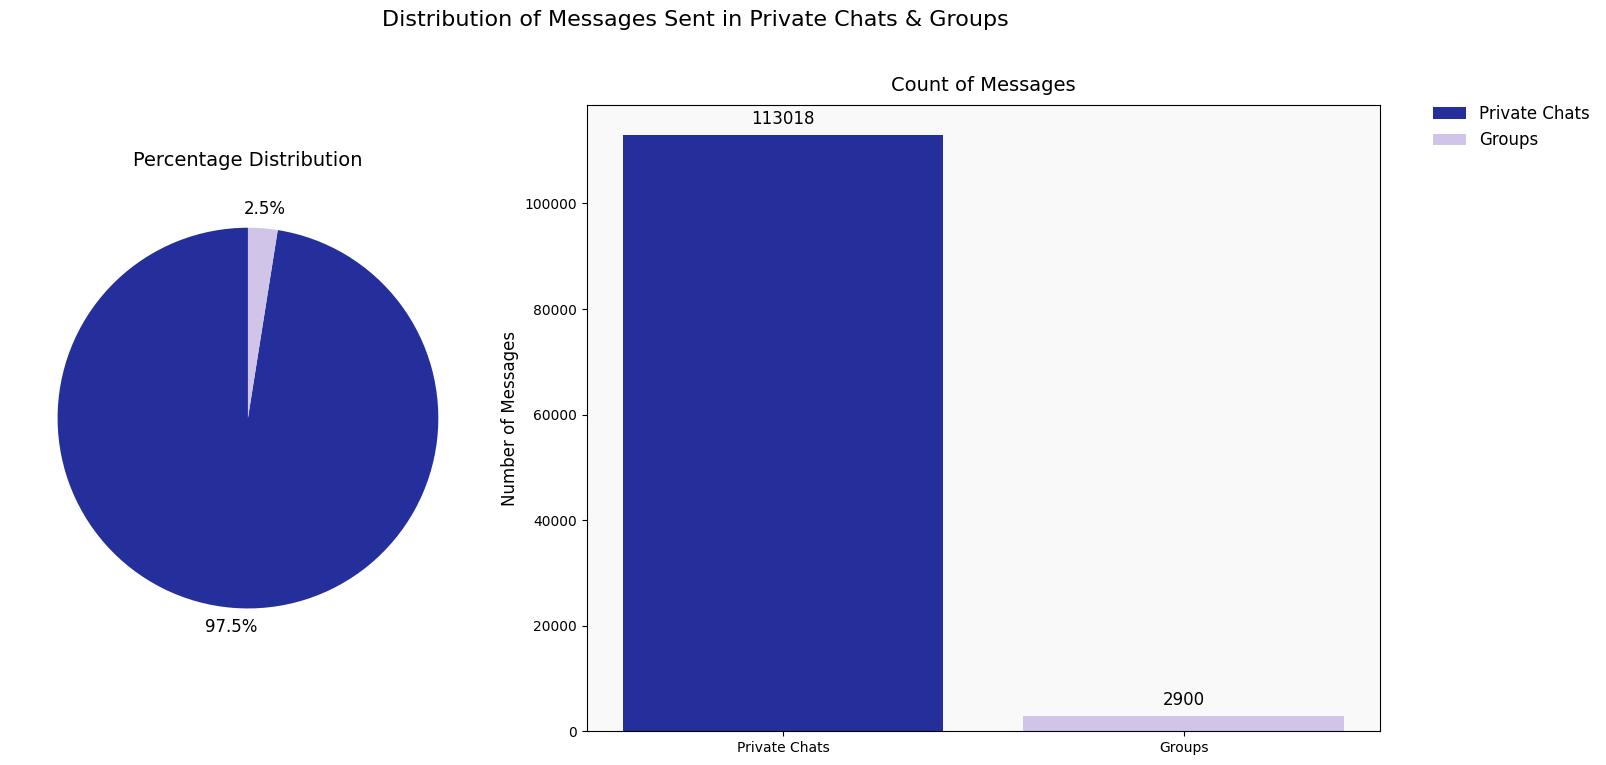

In [9]:
categories = ['Private Chats', 'Groups']
counts = [count_m, count_gm]
colors = ['#242F9B', '#D1C4E9']

fig, axs = plt.subplots(1, 2, figsize=(14, 8), gridspec_kw={'width_ratios': [0.6, 1]})
fig.suptitle('Distribution of Messages Sent in Private Chats & Groups', fontsize=16, y=0.95)

wedges, texts, autotexts = axs[0].pie(
    counts,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    textprops={'fontsize': 12},
    pctdistance=1.1
)
axs[0].set_title('Percentage Distribution', fontsize=14, pad=10)

bars = axs[1].bar(categories, counts, color=colors)
axs[1].set_title('Count of Messages', fontsize=14, pad=10)
axs[1].set_ylabel('Number of Messages', fontsize=12)
axs[1].set_facecolor('#F9F9F9')

for bar in bars:
    axs[1].text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 2000,
        f'{int(bar.get_height())}',
        ha='center',
        fontsize=12
    )

legend_elements = [
    Patch(facecolor=colors[0], label='Private Chats'),
    Patch(facecolor=colors[1], label='Groups')
]
fig.legend(
    handles=legend_elements,
    loc='upper right',
    fontsize=12,
    title_fontsize=14,
    bbox_to_anchor=(1.15, 0.85),
    frameon=False
)

plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()

The presented graph illustrates the overall trend of my communication habits, showing that I predominantly engage in one-on-one conversations in private chats and tend to avoid group interactions.

Here are a few interesting insights from social psychology that explain this phenomenon:

- **Social Loafing**: In group settings, individuals may subconsciously reduce their level of effort, assuming their contribution is less noticeable or significant compared to that of others. This tendency, known as social loafing, often results in decreased individual engagement in group interactions.  
  *(Source: Wikipedia - Social loafing)*
  https://en.wikipedia.org/wiki/Social_loafing

- **Groupthink**: In an effort to maintain harmony and consensus within a group, individuals might avoid sharing opinions that differ from the majority. This hesitation can suppress independent thoughts and lead to less active participation in group discussions.\
  *(Source: Wikipedia - Groupthink)* https://en.wikipedia.org/wiki/Groupthink

### How does my activity (messages sent by me) on Telegram change over time?

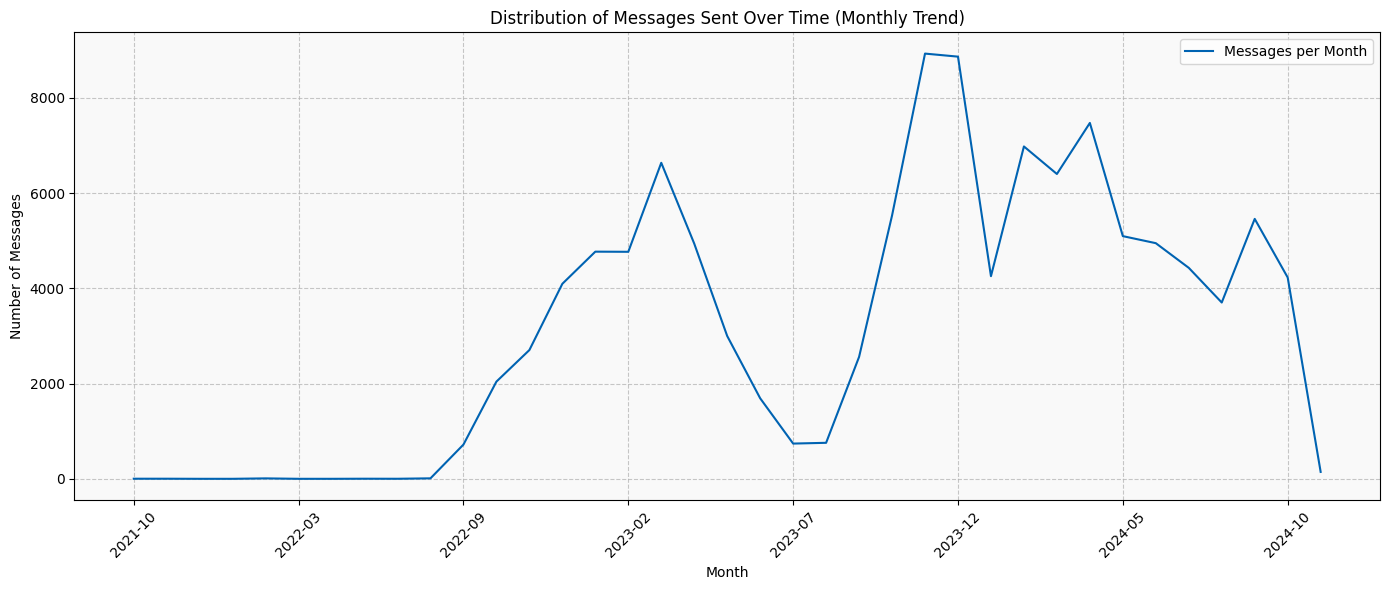

In [10]:
sent_by_me = sent_by_me.copy()
sent_by_me['date'] = pd.to_datetime(sent_by_me['date'], errors='coerce')
sent_by_me.loc[:, 'date'] = sent_by_me['date'].dt.tz_localize(None)
monthly_m_counts = sent_by_me.groupby(sent_by_me['date'].dt.to_period('M')).size()

plt.figure(figsize=(14, 6))
plt.plot(monthly_m_counts.index.astype(str), monthly_m_counts.values, linestyle='-', label='Messages per Month', color="#0063B2")

plt.title("Distribution of Messages Sent Over Time (Monthly Trend)")
plt.xlabel("Month")
plt.ylabel("Number of Messages")

plt.xticks(
    ticks=range(0, len(monthly_m_counts), 5), 
    labels=monthly_m_counts.index[::5].astype(str), 
    rotation=45
)

plt.grid(visible=True, linestyle='--', alpha=0.7)
plt.legend()

plt.gca().set_facecolor('#f9f9f9')

plt.tight_layout()
plt.show()

From the graph, we can conclude that my activity on Telegram increases significantly during the academic period. This rise reflects increased communication with a larger number of people. In contrast, during months like July 2023, my activity is noticeably lower, indicating that my interactions are primarily limited to close friends and family during that time.

An interesting psychological insight we can derive from this pattern is the impact of **social context** on communication behavior:

- During the academic period, there is often an increased need for collaboration, information sharing, and group coordination, which aligns with the theory of **situational social influence**. This theory suggests that environmental demands, like studying or working on group projects, naturally lead to more frequent interactions with a larger network of people.

- On the other hand, the decline in activity during months like July 2023 might reflect the **need for social rest** or a shift in communication priorities. In this period, people may focus on maintaining close personal relationships, which aligns with the concept of **intimacy in social networks**—prioritizing deeper connections over broader, task-oriented interactions. This is a reminder of how our communication patterns ebb and flow based on external circumstances and internal emotional needs.

### How does my Telegram activity change per day of the week?

In [11]:
#add a new column with day of week to dataframe with all my messages 
sent_by_me = sent_by_me.copy()
sent_by_me['day_of_week'] = sent_by_me['date'].dt.day_name() 
#calculating the average num. of messages per day
avg_m_per_day = sent_by_me.groupby('day_of_week').size() / sent_by_me['date'].dt.date.nunique()

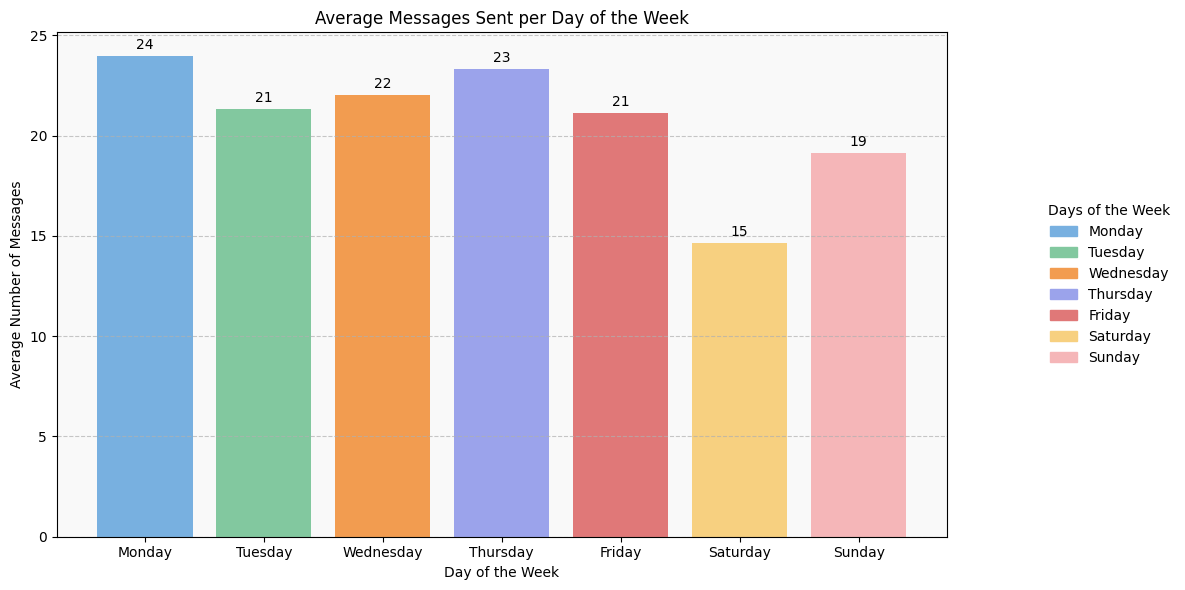

In [12]:
colors = [
    '#78B0E0',  # Monday
    '#82C89F',  # Tuesday
    '#F29C50',  # Wednesday
    '#9BA3EB',  # Thursday
    '#E07878',  # Friday
    '#F7D080',  # Saturday
    '#F5B6B8'   # Sunday
]

days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
avg_m_per_day = avg_m_per_day.reindex(days_order)

plt.figure(figsize=(12, 6)) 

bars = plt.bar(avg_m_per_day.index, avg_m_per_day.values, color=colors)

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.2, 
        f"{height:.0f}",
        ha='center', va='bottom', fontsize=10 
    )

legend_handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in colors]
plt.legend(
    legend_handles,
    days_order,
    title="Days of the Week",
    loc='center left',
    bbox_to_anchor=(1.1, 0.5), 
    fontsize=10,
    frameon=False
    
)

plt.title("Average Messages Sent per Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Average Number of Messages")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.gca().set_facecolor('#f9f9f9')

plt.tight_layout()
plt.show()


From the graph, we observe a fairly balanced distribution of messages across the days of the week, with no extreme variations. This consistency suggests that the data used for analysis is reliable and adequately represents messaging patterns. The differences between the days are minor, indicating a steady level of activity throughout the week. 

Here are some psychological insights we can derive from the graph:
- **Lower Activity on Saturdays**\
Saturdays show the lowest messaging activity, which might be explained by the natural shift in priorities during weekends. Psychologically, weekends are often seen as a time for relaxation, social outings, or disconnecting from routine online activities. People, including myself, may be spending more time engaging in offline social activities or resting, leading to a drop in messaging frequency.
- **Higher Activity on Mondays**\
Mondays, on the other hand, exhibit the highest messaging activity. This aligns with psychological patterns associated with the start of the week, new fresh beginning, which can increase activity and motivation to organize plans or reconnect with others.

#### Why were the colors chosen that way?

**Because there is such a phenomenon in cognitive psychology as synesthesia!**

**Synesthesia**, particularly grapheme-color synesthesia, is a neurological phenomenon where individuals associate sensory experiences with unrelated stimuli, such as colors with days of the week, letters, or numbers. This phenomenon reflects how the human brain often forms cross-modal associations, blending sensory inputs to create unique perceptions. While synesthesia is not universal, research has shown that many people form personal or cultural associations between abstract concepts, like days of the week, and specific colors.

*Source: https://en.wikipedia.org/wiki/Synesthesia*

### How does my Telegram activity change per time of the day?

In [13]:
# add a new column with hour
sent_by_me['hour'] = sent_by_me['date'].dt.hour
# count the number of messages for each hour of the day
hourly_message_counts = sent_by_me.groupby('hour').size()
# calculate the average number of messages per hour
avg_messages_per_hour = hourly_message_counts / sent_by_me['date'].dt.date.nunique()

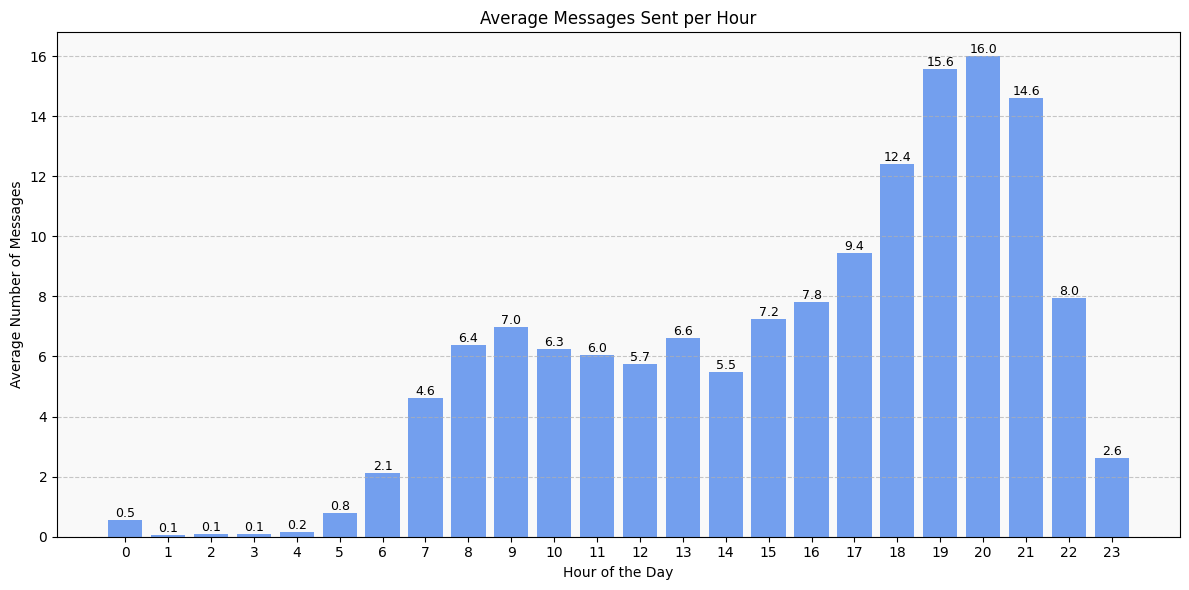

In [14]:
plt.figure(figsize=(12, 6))
plt.bar(avg_messages_per_hour.index, avg_messages_per_hour.values, color='#6495ED', alpha=0.9)

for i, val in enumerate(avg_messages_per_hour.values):
    plt.text(i, val + 0.1, str(round(val, 1)), ha='center', fontsize=9)

plt.title("Average Messages Sent per Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Number of Messages")
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().set_facecolor('#f9f9f9')

plt.tight_layout()
plt.show()

The graph highlights a peak in messaging activity during evening hours (6:00 PM to 9:00 PM), a time often dedicated to personal matters and social connection after a busy day. Conversely, activity drops significantly at night (12:00 AM to 5:00 AM) as most people are asleep, and it gradually rises in the morning as the day begins.

This pattern aligns with **studies** showing that evening phone use is a common way for people to unwind and **connect socially**. While this behavior fosters connection, it may also negatively impact sleep quality, emphasizing the need to balance digital engagement with rest. 

*(Source: TechRound - Study Reveals Phone Before Bed: The Cost)*\
https://techround.co.uk/tech/study-reveals-phone-before-bed-the-cost/

## Phone numbers analysis

### Analysis of the tendency to share phone numbers on Telegram

In [15]:
## adding a category for known and unknown numbers
df_meta['phone_status'] = df_meta['phone'].apply(lambda x: 'Known' if not pd.isna(x) else 'Unknown')
# counting the known and unknown numbers
phone_distribution = df_meta['phone_status'].value_counts()

C:\Users\User\AppData\Local\Temp\ipykernel_20236\1195142207.py:56: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  axs[2].add_patch(plt.Rectangle(


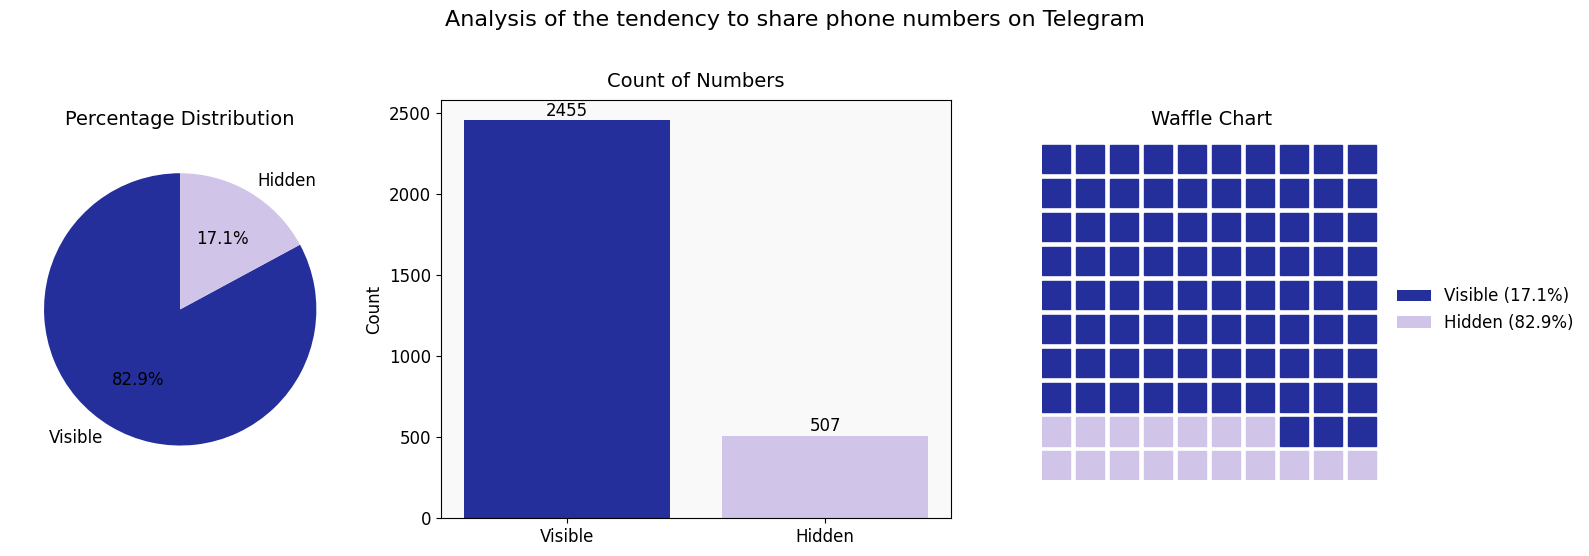

In [16]:
categories = ['Visible', 'Hidden']
colors = ['#242F9B', '#D1C4E9'] 

total_people = phone_distribution.sum()
known_ratio = phone_distribution['Known'] / total_people
unknown_ratio = phone_distribution['Unknown'] / total_people

# waffle chart setup
rows = 10
columns = 10
total_squares = rows * columns
known_squares = int(total_squares * known_ratio)
unknown_squares = total_squares - known_squares

grid = np.zeros(total_squares)
grid[:known_squares] = 1
grid[known_squares:] = 0
grid = grid.reshape((rows, columns))

# create subplots for the combined visualization
fig, axs = plt.subplots(1, 3, figsize=(16, 5.8), gridspec_kw={'width_ratios': [1, 1.5, 1]})
fig.suptitle('Analysis of the tendency to share phone numbers on Telegram', fontsize=16, y=0.95)

# pie chart
axs[0].pie(
    phone_distribution,
    labels=categories,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    textprops={'fontsize': 12}
)
axs[0].set_title('Percentage Distribution', fontsize=14, pad=10)

# Bar chart
bars = axs[1].bar(categories, phone_distribution, color=colors)
axs[1].set_title('Count of Numbers', fontsize=14, pad=10)
axs[1].set_ylabel('Count', fontsize=12)
axs[1].tick_params(axis='both', labelsize=12)
axs[1].set_facecolor('#F9F9F9')
for bar in bars:
    axs[1].text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 30,
        f"{bar.get_height():.0f}",
        ha='center',
        fontsize=12
    )

# waffle chart
square_size = 1.2
for row in range(grid.shape[0]):
    for col in range(grid.shape[1]):
        value = grid[row, col]
        color = colors[int(value)]
        axs[2].add_patch(plt.Rectangle(
            (col * square_size, row * square_size), 1, 1, color=color, edgecolor='none'
        ))

axs[2].set_xlim(0, columns * square_size)
axs[2].set_ylim(0, rows * square_size)
axs[2].set_xticks([])
axs[2].set_yticks([])
axs[2].set_aspect('equal')
axs[2].set_title('Waffle Chart', fontsize=14, pad=10)

for spine in axs[2].spines.values():
    spine.set_visible(False)

legend_elements = [
    Patch(facecolor=colors[0], label=f"Visible ({known_ratio*100:.1f}%)"),
    Patch(facecolor=colors[1], label=f"Hidden ({unknown_ratio*100:.1f}%)"),
]
axs[2].legend(
    handles=legend_elements,
    loc='center left',
    bbox_to_anchor=(1, 0.5),
    fontsize=12,
    frameon=False
)

plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()

#### "Every sixth person makes their phone number visible on Telegram."

This statement is based on the distribution, where 17.1% of people have their phone number visible, which is approximately 1 in 6 (100% / 17.1 ≈ 6).

#### Why do people hide their phone numbers?
- **Trust and Security Concerns**
In an era where data breaches and cyber scams are frequent, individuals are naturally inclined to safeguard their personal information. The fear of unsolicited contact, identity theft, or invasion of privacy often motivates people to minimize their exposure online. Telegram, known for its strong emphasis on security and privacy, further reinforces this mindset by offering users granular control over their visibility.
- **Psychology of Anonymity**
Research in social psychology shows that anonymity fosters a sense of control and freedom in communication. By keeping their phone numbers hidden, users maintain an extra layer of anonymity, which allows them to engage in conversations without the fear of being overly exposed or vulnerable. This aligns with theories like "The Online Disinhibition Effect," where people feel safer and more open in anonymous interactions.

## Emoji usage

### Which emojis do I use most frequently in my messages?

In [17]:
sent_by_me['message'] = sent_by_me['message'].astype(str)

In [18]:
def extract_emojis(text):
    emoji_pattern = re.compile("["
        "\U0001F600-\U0001F64F" 
        "\U0001F300-\U0001F5FF"
        "\U0001F680-\U0001F6FF"
        "\U0001F700-\U0001F77F"
        "\U0001F780-\U0001F7FF"
        "\U0001F800-\U0001F8FF"
        "\U0001F900-\U0001F9FF"
        "\U0001FA00-\U0001FA6F" 
        "\U0001FA70-\U0001FAFF" 
        "\U00002702-\U000027B0" 
        "\U000024C2-\U0001F251"
        "]+", flags=re.UNICODE)
    if isinstance(text, str):
        return emoji_pattern.findall(text)
    return []

sent_by_me['extracted_emojis'] = sent_by_me['message'].apply(extract_emojis)
all_emojis = sent_by_me['extracted_emojis'].explode()

emoji_counts = Counter(all_emojis.dropna())
top_emojis = emoji_counts.most_common(20)

In [19]:
emojis, counts = zip(*top_emojis)
colors = ['#FF6F61', '#6B5B95',  '#88B04B', '#F7CAC9',  '#92A8D1',  '#F4A896', '#DEC9E9','#FFD662',  '#D8A47F',  '#8CCCD3',  '#E2A4B8',  '#74C365',  '#FFA07A',  '#FFDAB9',  '#E6E6FA',  '#6495ED']

repeated_colors = [colors[i % len(colors)] for i in range(len(emojis))]
percentages = [count / sum(counts) * 100 for count in counts]

fig = make_subplots(
    rows=1, cols=2,
    column_widths=[0.6, 0.4], 
    specs=[[{'type': 'xy'}, {'type': 'domain'}]], 
    subplot_titles=["Emoji Frequencies", "Percentage Usage"]
)

fig.add_trace(
    go.Bar(
        x=list(range(len(emojis))),
        y=counts,
        text=emojis,
        textposition='outside',
        marker_color=repeated_colors,
    ),
    row=1, col=1
)

fig.update_xaxes(
    tickvals=[], 
    title_text="Top Emojis (Ordered by Frequency)",
    title_font=dict(size=14)
)

fig.update_yaxes(
    title_text="Frequency",  
    title_font=dict(size=14),
    showgrid=True,
    gridcolor='rgba(200, 200, 200, 0.5)' 
)

fig.add_trace(
    go.Pie(
        labels=emojis,
        values=percentages,
        marker=dict(colors=repeated_colors),
        textinfo='label+percent',
        hoverinfo='label+percent',
    ),
    row=1, col=2
)

fig.update_layout(
    title="Emoji Usage Analysis",
    title_font=dict(size=18),
    title_x=0.5,
    plot_bgcolor='rgba(240, 240, 240, 1)',
    showlegend=False,
    height=600,
    width=1300,
)

fig.show()

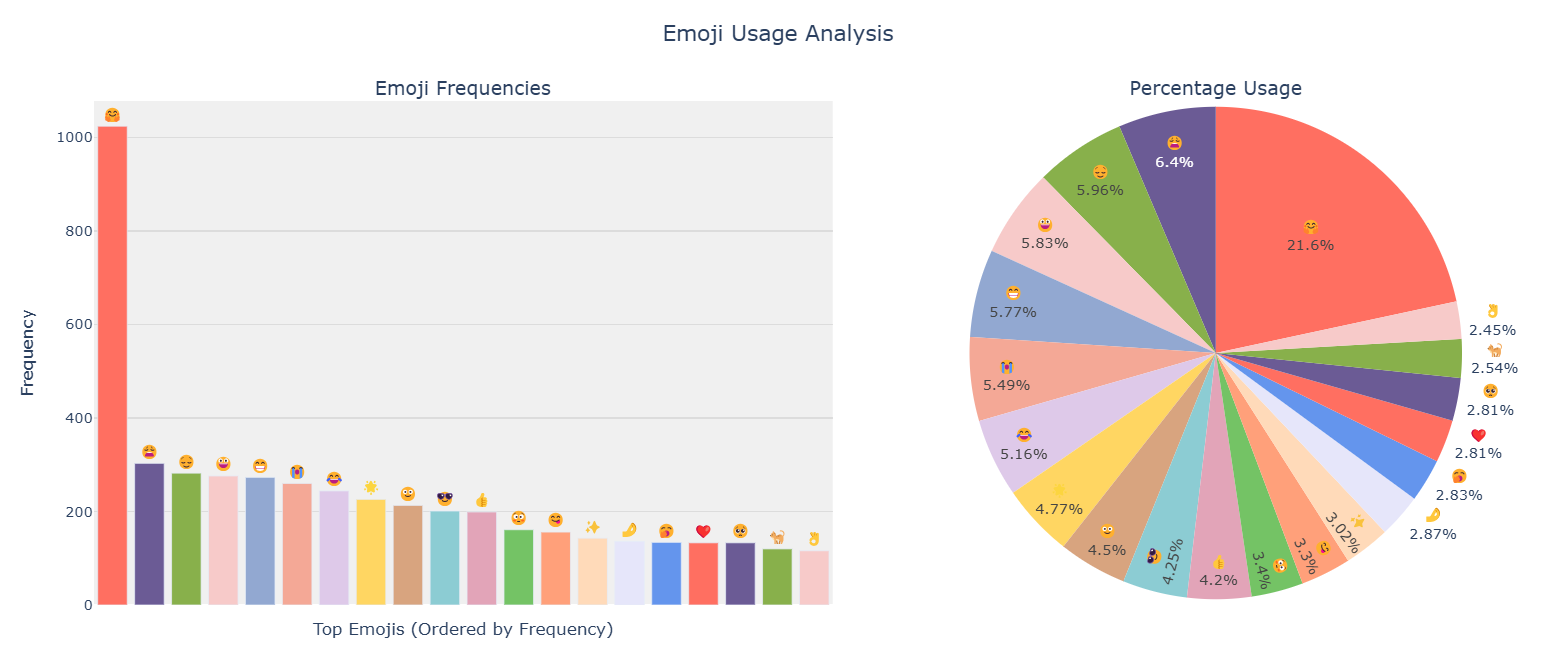

From the graph, we can clearly observe an intriguing distribution of emoji usage. Notably, the emoji 🤗 stands out prominently. This is due to an interesting detail: in Telegram, every sticker is represented by a corresponding emoji. In this case, the 🤗 emoji is linked to a specific sticker that holds personal significance for me. This sticker is part of a local joke with one person, and we frequently send it, which explains its overwhelming usage.

Reflecting on this pattern of activity—observing not just shared habits but also analyzing them quantitatively through numbers and visuals—makes this project particularly engaging. It demonstrates how personal interactions can be represented in data, adding an insightful and relatable dimension to the analysis.

The sticker noticed:

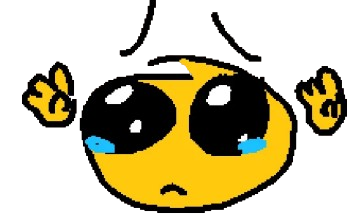

### Chrono-Emotional Analysis: emoji categories and their dominance by hour of the day

In [20]:
emoji_categories = {
    "Funny": ['😂', '🤣', '😆', '😁', '😃', '😎'],
    "Romantic": ['❤️', '😘', '💕', '🤗', '😌', '🥺'],
    "Sad": ['😢', '😞', '💔', '😭'],
    "Passive Aggression": ['👍', '🙂', '😃'],
    "Cats": ['🐈'], 
    "Sleepy": ['🥱']    
}

    # "Other": ['🔥', '🌟', '👌', '✨', '🤌'],
def categorize_emoji(emoji):
    for category, emojis in emoji_categories.items():
        if emoji in emojis:
            return category
    return "Other"

sent_by_me['emoji_category'] = sent_by_me['extracted_emojis'].apply(
    lambda emojis: [categorize_emoji(e) for e in emojis] if isinstance(emojis, list) else None
)

In [21]:
exploded = sent_by_me.explode('emoji_category')
hourly_category_counts = exploded.groupby(['hour', 'emoji_category']).size().unstack(fill_value=0)

In [22]:
fig = go.Figure()

line_colors = ['#FFCC00', '#FF69B4', '#4F75FF', '#8A2BE2', '#FF7F50', '#37AFE1'] 

for i, category in enumerate(emoji_categories.keys()):
    fig.add_trace(
        go.Scatter(
            x=hourly_category_counts.index,
            y=hourly_category_counts[category],
            mode='lines+markers',
            name=category,
            line=dict(color=line_colors[i % len(line_colors)])
        )
    )

fig.update_layout(
    title=dict(
        text="Dominant Emoji Categories by Hour of the Day",
        x=0.5,
        xanchor="center"
    ),
    xaxis=dict(
        title="Hour of the Day",
        tickvals=list(range(0, 24, 2)), 
        ticktext=[str(hour) for hour in range(0, 24, 2)], 
    ),
    yaxis_title="Emoji Count",
    plot_bgcolor='rgba(240, 240, 240, 1)',
    # plot_bgcolor='rgba(0, 0, 0, 0)',
    legend_title="Emoji Categories",
    width=1000,
    height=600
)

fig.show()

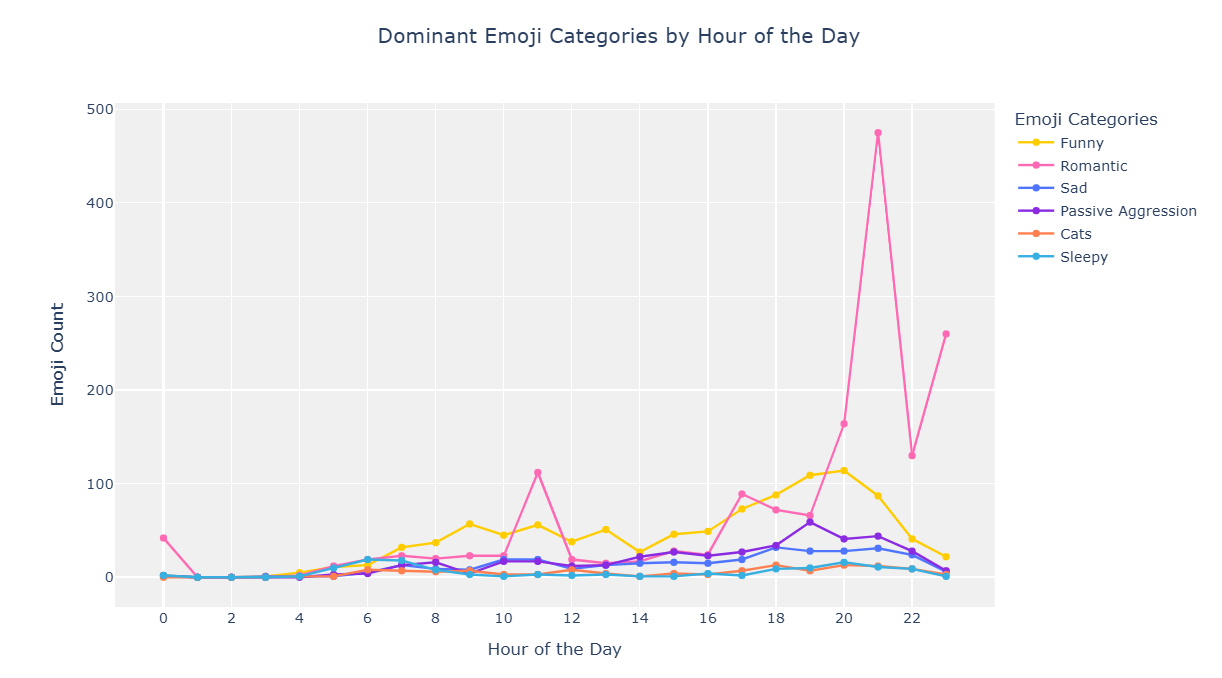

**Chrono-Emotional Analysis: Emoji Categories by Hour**
(*emotional patterns linked to different hours*)

From the analysis, we can observe that the evening and the latter part of the day are the most active in terms of the number of messages and emojis overall. Now, let’s dive into the emotional patterns.

- Firstly, what stands out is the prominence of **romantic emojis**. This can be attributed to the fact that people tend to feel more relaxed and open in the evenings, leading to an increase in sending hearts and cute cat emojis (which we’ve categorized separately). Moreover, emotions in general appear to be more pronounced during this time of day, reflecting deeper or more expressive communication.
- In contrast, the mornings and early afternoons exhibit more **balanced** usage across categories, likely reflecting routine interactions or work-related conversations. Humor ("Funny" emojis) steadily rises throughout the day, suggesting people’s need for lighthearted exchanges as the day progresses. Meanwhile, the **"Sad"** and **"Passive Aggression"** categories subtly spike during moments of reflection or frustration, perhaps tied to daily challenges.

Overall, the analysis showcases how different emotional expressions dominate various parts of the day, with the evening standing out as the most emotionally vibrant period.

#### Dataframe merging

First of all, I merged the downloaded JSON data slightly differently, resulting in one row per Telegram chat. I had to edit the provided code. If you have any questions, I can answer them. (0_merge_data.ipynb: https://github.com/SanGreel/telegram-dialogs-analysis-v2/blob/main/0_merge_data.ipynb) This approach made it possible to perform data merging. Now it's more convenient to link, for example, the `dialog_id` with the chat name.

In [23]:
file_path = 'final_data/final_info_users_for_merge.csv'
df_meta_2 = pd.read_csv(file_path)

In [24]:
df_meta_2 = df_meta_2.rename(columns={'id': 'dialog_id'})

In [25]:
merged_df = df.merge(df_meta_2, on='dialog_id', how='left')

In [26]:
merged_df.shape

(1262176, 13)

In [27]:
private_df = merged_df[merged_df['type_y']=='Private dialog'] # only private dialogs

#### topic

### How does the number of received messages сhange on my Birthday?

In [28]:
private_df_nmy = private_df[private_df['from_id'] == 0]

In [29]:
private_df_nmy = private_df_nmy.copy()
private_df_nmy['date'] = pd.to_datetime(private_df_nmy['date'], errors='coerce')

birthday_filter_start = '2023-11-12'
birthday_filter_end = '2023-11-15'

filtered_birthday_messages = private_df_nmy.loc[
    (private_df_nmy['date'] >= birthday_filter_start) & (private_df_nmy['date'] <= birthday_filter_end)
]

messages_per_hour = (
    filtered_birthday_messages
    .groupby(filtered_birthday_messages['date'].dt.floor('H'))
    .size()
    .reset_index(name='message_count')
)

messages_per_hour.rename(columns={'date': 'hour'}, inplace=True)

In [30]:
fig = go.Figure()
fig.add_trace(
    go.Scatter(
        x=messages_per_hour['hour'],
        y=messages_per_hour['message_count'],
        mode='lines+markers',
        line=dict(color='#FF69B4', width=2), 
        marker=dict(size=6),
        name='Message Count'
    )
)
fig.update_layout(
    title={
        'text': "Hourly Received Message Count (12th - 15th November 2023)",
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis_title="Hour",
    yaxis_title="Message Count",
    xaxis=dict(
        tickformat="%d-%b %H:%M",
        tickangle=45,
        title_font=dict(size=14),
    ),
    yaxis=dict(title_font=dict(size=14)),
    template="plotly_white",
    width=1000,
    height=600,
    plot_bgcolor='rgba(240, 240, 240, 1)',
    xaxis_showgrid=True,
    yaxis_showgrid=True,
    xaxis_gridcolor='rgba(255, 255, 255, 1)', 
    yaxis_gridcolor='rgba(255, 255, 255, 1)'  
)

fig.show()

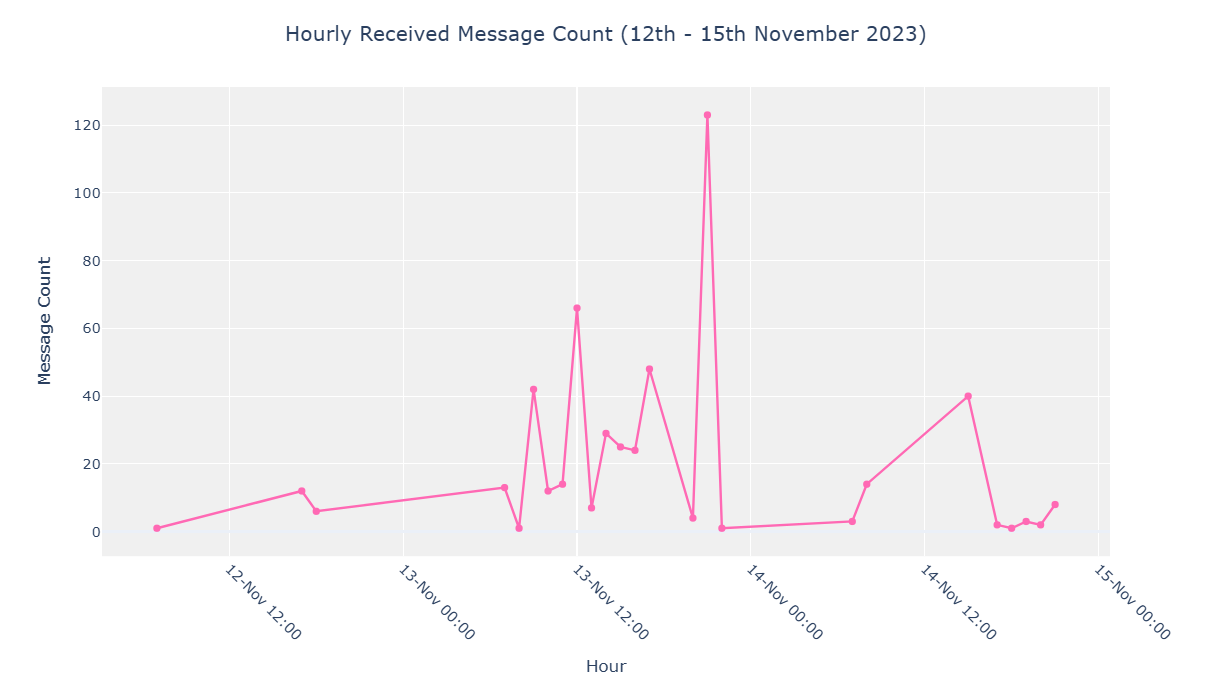

This graph shows the hourly distribution of received messages between the 12th and 15th of November 2023, highlighting a significant spike in message activity on the 14th of November, which corresponds to an event - a birthday. 

## Analysis of the communication session duration in private Telegram chats

### Distribution of communication sessions and their duration

In [31]:
chat_message_counts = private_df.groupby('dialog_id').size().reset_index(name='message_count')
top_chats = chat_message_counts.sort_values(by='message_count', ascending=False)
top_chats = top_chats.merge(private_df[['dialog_id', 'name']].drop_duplicates(), on='dialog_id', how='left')
# top_chats

In [32]:
private_df['date'] = pd.to_datetime(private_df['date'])  # datetime
private_df = private_df.sort_values(['dialog_id', 'date'])

# сalculating the time difference between messages for each chat
private_df['time_diff'] = private_df.groupby('dialog_id')['date'].diff().dt.total_seconds()

# marking a new session if the difference exceeds 30 minutes (1800 seconds)
private_df.loc[:, 'new_session'] = private_df['time_diff'] > 1800

# generating a unique ID for each session
private_df.loc[:, 'session_id'] = private_df.groupby('dialog_id')['new_session'].cumsum()

# calculation of the duration of each session for each chat
session_durations = private_df.groupby(['dialog_id', 'session_id']).agg(
    session_start=('date', 'min'),
    session_end=('date', 'max')
)
session_durations['session_duration'] = (session_durations['session_end'] - session_durations['session_start']).dt.total_seconds()
all_durations = session_durations['session_duration']

C:\Users\User\AppData\Local\Temp\ipykernel_20236\3710806519.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [33]:
all_durations_minutes = session_durations['session_duration'] / 60
# only durations > 5 minutes
filtered_durations = all_durations_minutes[all_durations_minutes > 5]

# colors = ['#5A639C', '#7776B3', '#9B86BD', '#E2BBE9']
hist_data, bin_edges = np.histogram(filtered_durations, bins=30)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
# repeated_colors = [colors[i % len(colors)] for i in range(len(bin_centers))]

In [34]:
fig = go.Figure()

fig.add_trace(
    go.Bar(
        x=bin_centers,
        y=hist_data,
        # marker=dict(color=repeated_colors),
        text=hist_data,
        textposition="outside"
    )
)

fig.update_layout(
    title="Session Duration Distribution",
    title_font=dict(size=18),
    title_x=0.5, 
    xaxis=dict(
        title="Session Duration (Minutes)",
        tickangle=0,
        tickmode="linear",
        tick0=0, 
        dtick=20,
        title_font=dict(size=14),
        range=[5, 220]
    ),
    yaxis=dict(
        title="Number of Sessions",
        gridcolor="white",
        zerolinecolor="white",
        title_font=dict(size=14)
    ),
    plot_bgcolor="rgba(240, 240, 240, 1)",
    width=1000,
    height=600
)

fig.show()

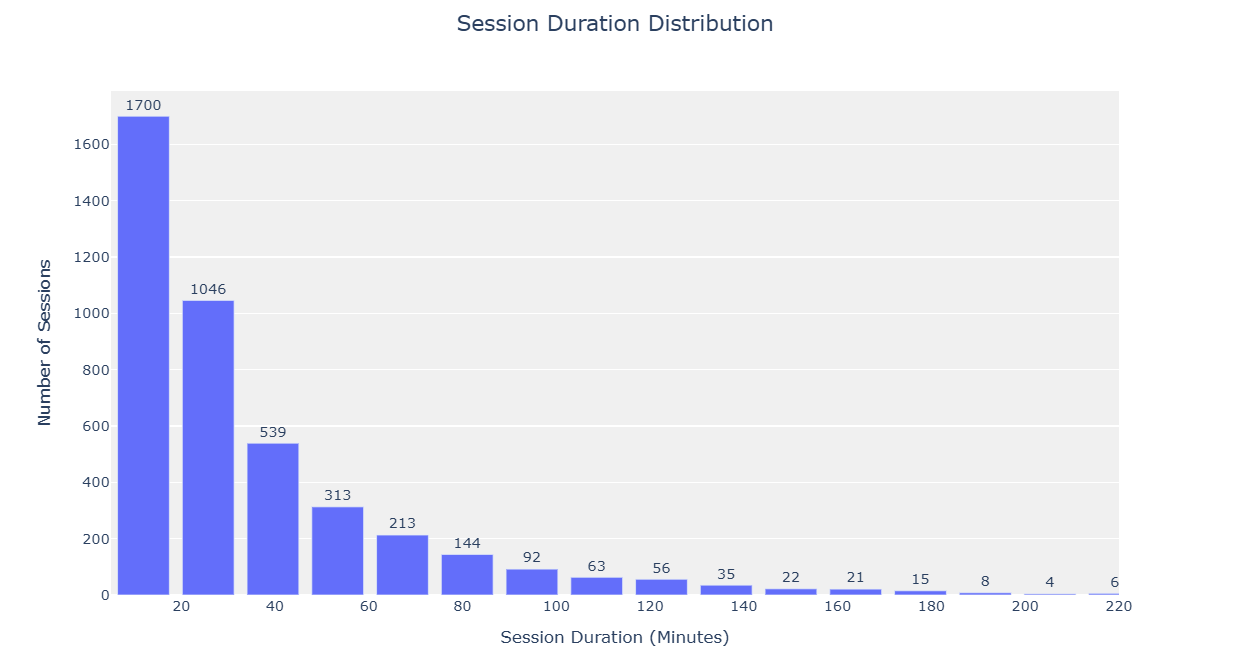

The graph shows that most communication sessions in private chats are short, typically lasting less than 40 minutes, with a sharp decline in session counts beyond 60 minutes. This distribution likely reflects the nature of private messaging, where quick exchanges dominate, often characterized by short "question-response" interactions. Longer sessions (over 100 minutes) are rare and may be tied to specific contexts, such as detailed planning or emotional discussions. The large peak for sessions under 20 minutes suggests frequent, immediate responses, while the overall decrease in longer sessions highlights their less common nature.

### Distribution of the average communication session duration and chat names

In [35]:
top_chat_ids = top_chats['dialog_id'].head(15)
top_sessions = session_durations[session_durations.index.get_level_values('dialog_id').isin(top_chat_ids)]

average_session_duration = (
    top_sessions.groupby('dialog_id')['session_duration']
    .mean()
    .reset_index()
)

average_session_duration['session_duration'] = average_session_duration['session_duration'] / 60  

average_session_duration = average_session_duration.merge(
    top_chats[['dialog_id', 'name']],
    on='dialog_id',
    how='left'
)

average_session_duration = average_session_duration.sort_values(by='session_duration', ascending=False)

In [36]:
fig = px.bar(
    average_session_duration,
    x='name',
    y='session_duration',
    title='Average Session Duration per Chat',
    labels={'name': 'Chat Name', 'session_duration': 'Average Session Duration (Minutes)'},
    template='plotly_white',
    text='session_duration'
)

fig.update_traces(
    texttemplate='%{text:.2f}', 
    textposition='outside',
    # marker_color=repeated_colors
)
fig.update_layout(
        yaxis=dict(
        title="Average Session Duration (Minutes)",
        gridcolor="white",
        zerolinecolor="white",
    ),
    
    xaxis_title="Chat Name",
    title_font=dict(size=18),
    title_x=0.5,
    width=1000,
    height=600,
    plot_bgcolor="rgba(240, 240, 240, 1)"
)

fig.show()

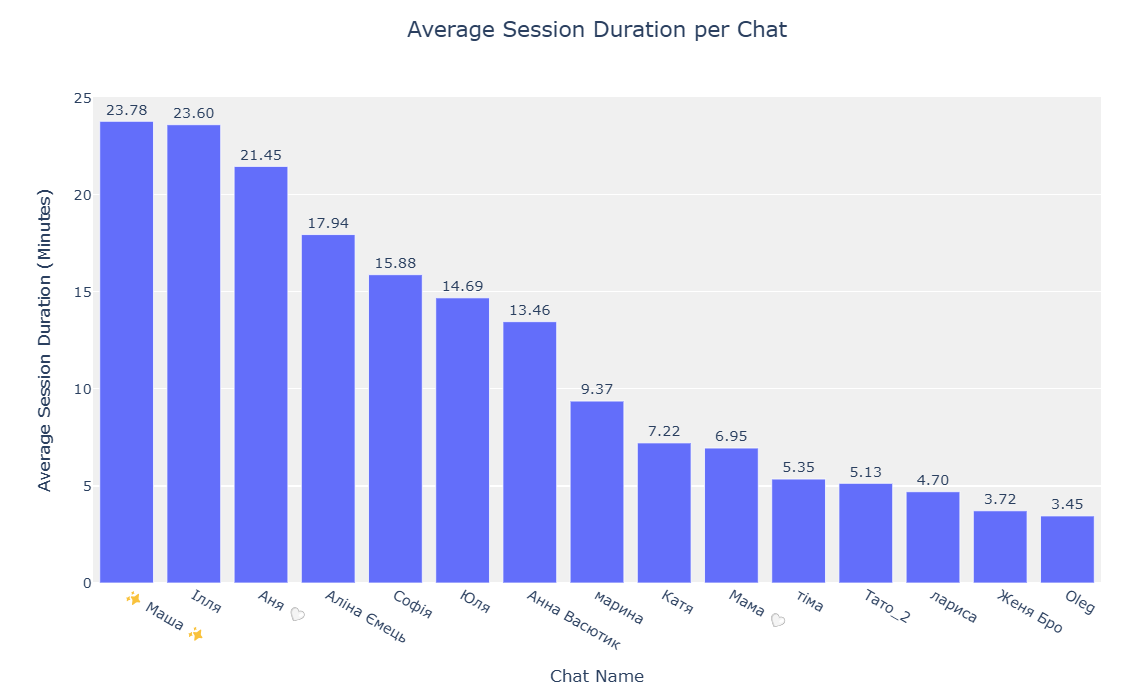

This graph represents an interesting distribution of **average session durations across personal chats**. It provides a unique view of communication patterns with different individuals, highlighting the variability in engagement durations. The chart was created purely for the sake of **satisfying personal curiosity** and exploring how interaction times differ across private conversations.

### Distribution of the average communication session duration by the category of the chat

Previously, I categorized the chats in the dataframe.

In [37]:
file_path = "top_chats.csv"
top_chats = pd.read_csv(file_path)

In [38]:
top_chat_ids = top_chats['dialog_id']
top_sessions = session_durations[session_durations.index.get_level_values('dialog_id').isin(top_chat_ids)]

average_session_duration = (
    top_sessions.groupby('dialog_id')['session_duration']
    .mean()
    .reset_index()
)

average_session_duration['session_duration'] = average_session_duration['session_duration'] / 60

average_session_duration = average_session_duration.merge(
    top_chats[['dialog_id', 'name', 'category']],
    on='dialog_id',
    how='left'
)

average_duration_by_category = (
    average_session_duration.groupby('category')['session_duration']
    .mean()
    .reset_index()
    .sort_values(by='session_duration', ascending=False)
)

In [39]:
category_colors = {
    'relationships': '#FF69B4', 
    'family': '#80C4E9',    
    'friends': '#FFD662',   
    'work': '#8A2BE2',       
    'uni': '#4F75FF',        
    'else': '#cccccc'          
}

bar_colors = [category_colors[cat] for cat in average_duration_by_category['category']]

bar_chart = go.Bar(
    x=average_duration_by_category['category'],
    y=average_duration_by_category['session_duration'],
    text=average_duration_by_category['session_duration'],
    textposition='outside',
    marker_color=bar_colors, 
    showlegend=False
)

pie_chart = go.Pie(
    labels=average_duration_by_category['category'],
    values=average_duration_by_category['session_duration'],
    marker=dict(colors=bar_colors),
    textinfo='label+percent',
    hoverinfo='label+percent'
)

fig = make_subplots(
    rows=1, cols=2,
    column_widths=[0.6, 0.4],
    specs=[[{'type': 'xy'}, {'type': 'domain'}]],
    subplot_titles=["Average Session Duration by Category", "Distribution by Category"]
)

fig.add_trace(bar_chart, row=1, col=1)
fig.add_trace(pie_chart, row=1, col=2)

fig.update_xaxes(
    title_text="Category",
    title_font=dict(size=14),
    showgrid=False,
    row=1, col=1
)

fig.update_yaxes(
    title_text="Average Duration (Minutes)",
    title_font=dict(size=14),
    gridcolor='rgba(200, 200, 200, 0.5)',
    row=1, col=1
)

fig.update_traces(
    selector=dict(type='bar'),
    texttemplate='%{text:.1f}'  
)

fig.update_layout(
    title="Average Session Duration Analysis",
    title_font=dict(size=18),
    title_x=0.5,
    showlegend=True,
    plot_bgcolor='rgba(240, 240, 240, 1)',
    height=600,
    width=1300
)

fig.show()

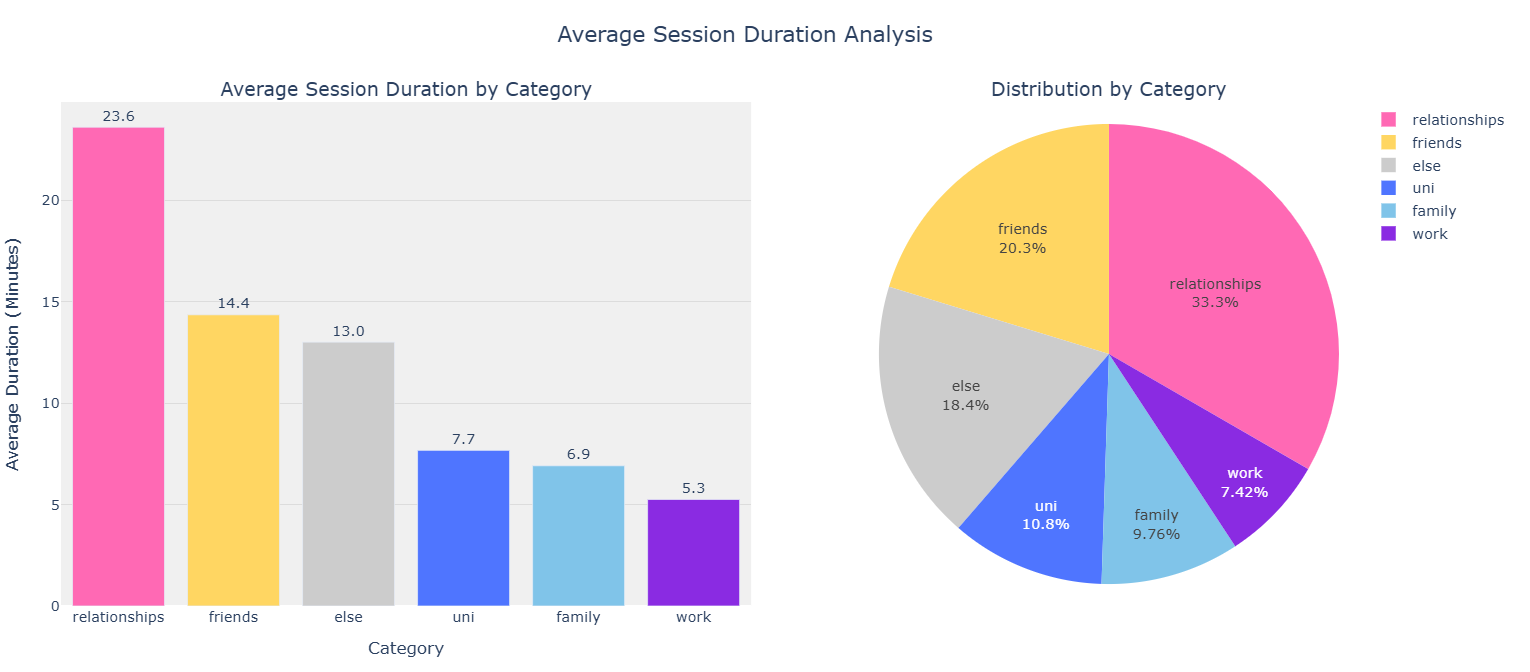

#### Insights from the graph:

- **Deep Engagement in Relationships**: The extended session durations in the "relationships" category indicate deeper connections and potentially emotionally significant interactions.
- **Work Efficiency**: The shorter duration of "work" chats highlights their goal-oriented nature, focusing on quick decision-making or updates.
- **Balanced Communication with Friends**: The "friends" category shows a balance between casual and meaningful conversations.
- **Family Communication**: The shorter duration and smaller share of family-related chats suggest that I primarily communicate with my family offline rather than online. Telegram is not the main platform for these interactions, which explains the distribution observed.

### Distribution of the average communication session duration by the gender

Previously, I categorized the chats by gender in the dataframe.

In [40]:
# df_private_gender

In [41]:
file_path = "df_merged_private.csv"
df_private_gender = pd.read_csv(file_path)

In [42]:
df_private_gender_filtered = df_private_gender[df_private_gender['date'] >= '2023-01-01']

private_chat_ids = df_private_gender_filtered['dialog_id'].unique()

private_sessions = session_durations[session_durations.index.get_level_values('dialog_id').isin(private_chat_ids)]

average_session_duration_gender = (
    private_sessions.groupby('dialog_id')['session_duration']
    .mean()
    .reset_index()
)

average_session_duration_gender['session_duration'] = average_session_duration_gender['session_duration'] / 60

average_session_duration_gender = average_session_duration_gender.merge(
    df_private_gender_filtered[['dialog_id', 'gender']].drop_duplicates(),
    on='dialog_id',
    how='left'
)

average_duration_by_gender = (
    average_session_duration_gender.groupby('gender')['session_duration']
    .mean()
    .reset_index()
    .sort_values(by='session_duration', ascending=False)
)

In [43]:
colors = [ '#cccccc', '#c90076', '#2986cc']

average_duration_by_gender['gender'] = average_duration_by_gender['gender'].str.capitalize()
average_duration_by_gender['gender'] = average_duration_by_gender['gender'].replace({'Male': 'Men', 'Female': 'Women', 'Other': 'Undefined'})

fig = make_subplots(
    rows=1, cols=2,
    column_widths=[0.6, 0.4],
    specs=[[{'type': 'xy'}, {'type': 'domain'}]],
    subplot_titles=["Average Session Duration by Gender (Minutes)", "Gender Distribution (Percentage)"]
)

fig.add_trace(
    go.Bar(
        x=average_duration_by_gender['gender'],
        y=average_duration_by_gender['session_duration'],
        text=average_duration_by_gender['session_duration'].round(1),
        textposition='outside',
        marker_color=colors[:len(average_duration_by_gender)],
        showlegend=False
    ),
    row=1, col=1
)

fig.update_xaxes(title_text="Gender", title_font=dict(size=14))
fig.update_yaxes(title_text="Average Session Duration (Minutes)", title_font=dict(size=14), showgrid=True, gridcolor='rgba(200, 200, 200, 0.5)')

fig.add_trace(
    go.Pie(
        labels=average_duration_by_gender['gender'],
        values=average_duration_by_gender['session_duration'],
        marker=dict(colors=colors[:len(average_duration_by_gender)]),
        textinfo='label+percent',
        hoverinfo='label+percent',
    ),
    row=1, col=2
)

fig.update_layout(
    title="Average Session Duration by Gender",
    title_font=dict(size=18),
    title_x=0.5,
    plot_bgcolor='rgba(240, 240, 240, 1)',
    showlegend=True,
    height=600,
    width=1200,
)

fig.show()


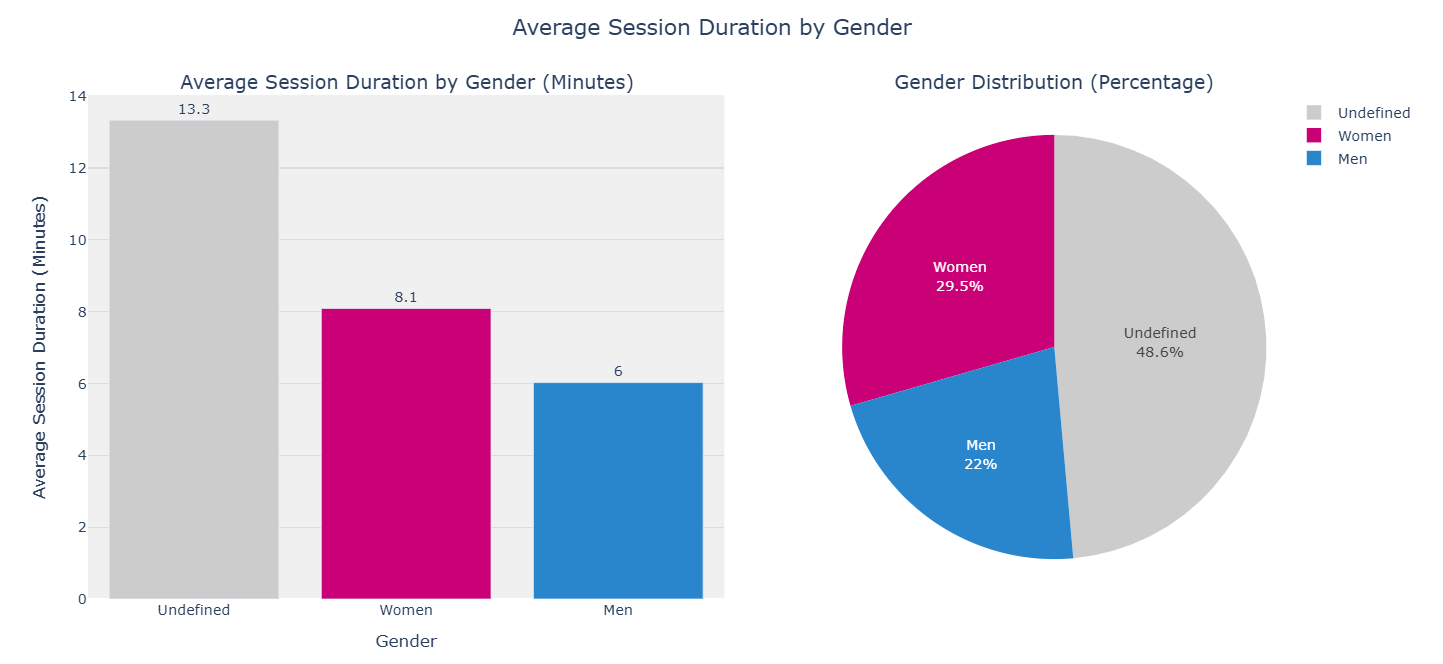

The chart illustrates how **session duration varies by gender.** A significant portion of the data is categorized as **"undefined,"** primarily due to chats with bots or my own saved messages, where I often jot down notes or ideas. Notably, conversations with **women** tend to last longer on average compared to those with men, reflecting differences in engagement and interaction patterns.

### How the average (weekly) communication session duration by the gender change over time?

In [44]:
session_durations = session_durations.reset_index()

session_durations['session_start'] = pd.to_datetime(session_durations['session_start'])

session_durations['date'] = session_durations['session_start'].dt.date

private_sessions = session_durations[
    (session_durations['dialog_id'].isin(private_chat_ids)) &
    (session_durations['date'] >= pd.Timestamp('2021-01-01').date())
]

merged_data = private_sessions.merge(
    df_private_gender_filtered[['dialog_id', 'gender']].drop_duplicates(),
    on='dialog_id',
    how='left'
)

weekly_avg_duration = (
    merged_data.groupby(['gender', pd.Grouper(key='session_start', freq='W')])['session_duration']
    .mean()
    .reset_index()
)

weekly_avg_duration['session_duration'] = weekly_avg_duration['session_duration'] / 60

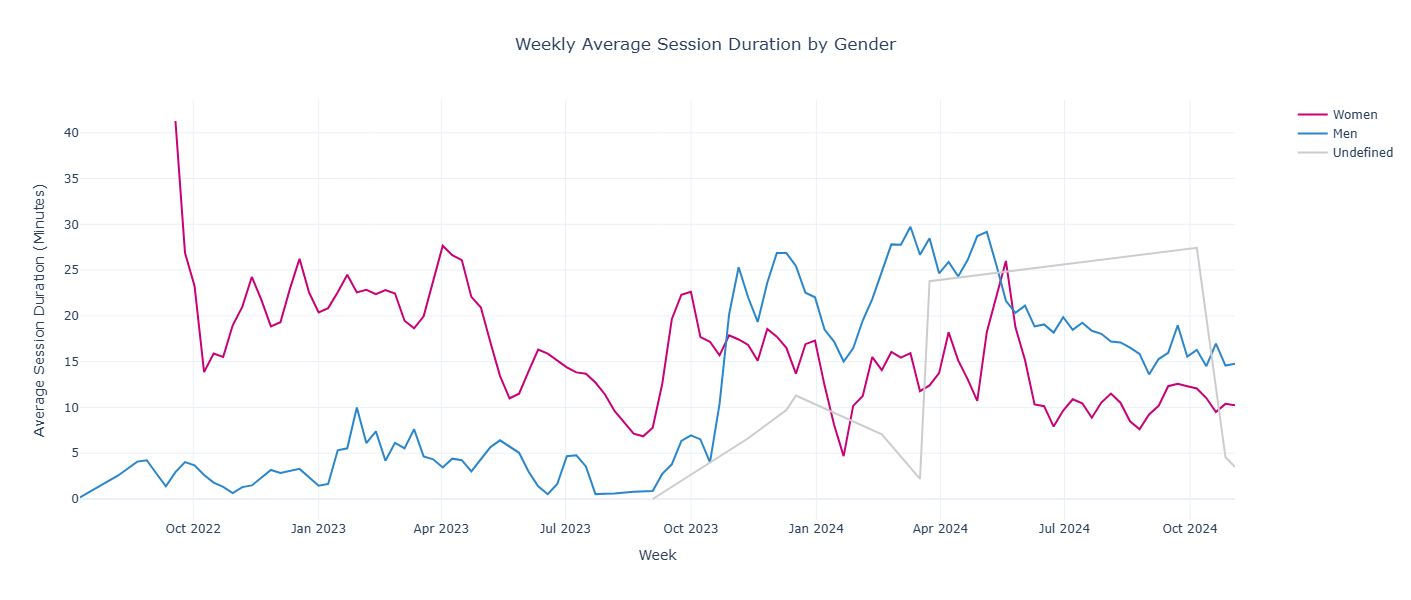

In [45]:
weekly_avg_duration.loc[:, 'gender'] = weekly_avg_duration['gender'].str.capitalize()
weekly_avg_duration.loc[:, 'gender'] = weekly_avg_duration['gender'].replace({'Male': 'Men', 'Female': 'Women', 'Other': 'Undefined'})

fig = go.Figure()

colors = ['#cccccc', '#c90076', '#2986cc']

gender_color_map = {
    'undefined': colors[0],
    'women': colors[1],
    'men': colors[2],
}

for gender in weekly_avg_duration['gender'].unique():
    gender_data = weekly_avg_duration[weekly_avg_duration['gender'] == gender]
    gender_data = gender_data.copy() 
    gender_data['smoothed_duration'] = gender_data['session_duration'].rolling(3, min_periods=1).mean()
    
    fig.add_trace(
        go.Scatter(
            x=gender_data['session_start'],
            y=gender_data['smoothed_duration'],
            mode='lines',
            name=gender.capitalize(),
            line=dict(color=gender_color_map[gender.lower()], width=2)
        )
    )

fig.update_layout(
    title="Weekly Average Session Duration by Gender",
    title_x=0.5,
    xaxis_title="Week",
    yaxis_title="Average Session Duration (Minutes)",
    xaxis=dict(tickformat="%b %Y"),  
    legend=dict(x=1.05, y=1),     
    template="plotly_white",
    width=1000,
    height=600
)

fig.show()

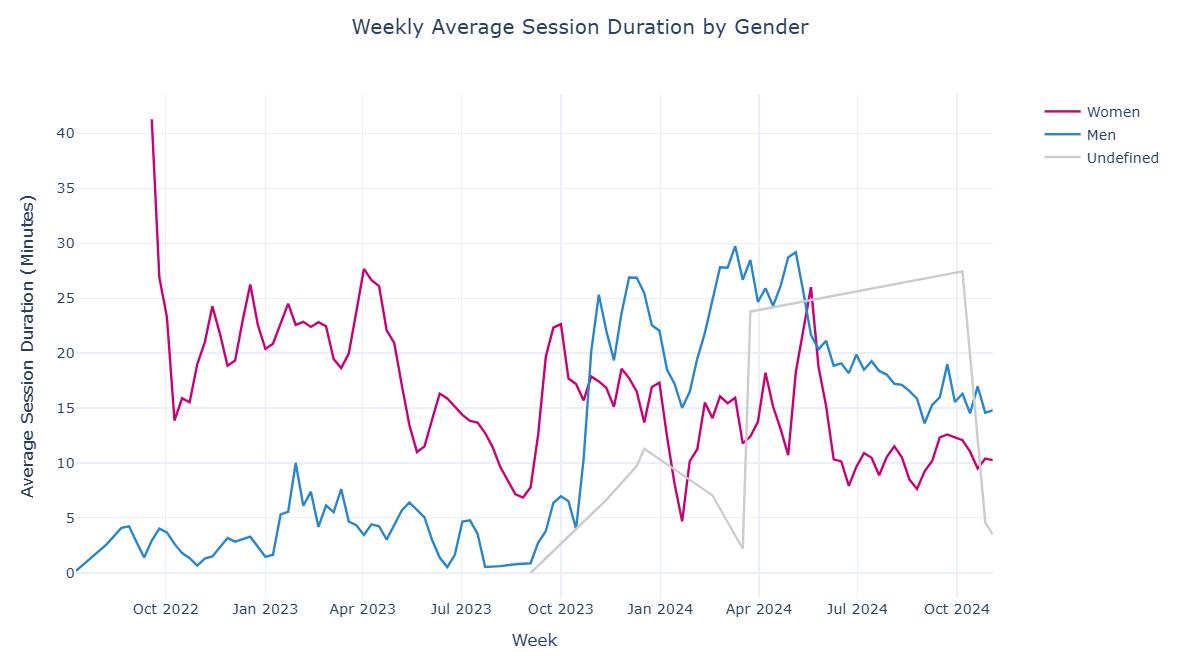

From the graph, it is evident how and for how long I communicate with each gender. Until the fall of 2023, I had very little interaction with men, but this trend shifted significantly afterward. Eventually, the session durations between genders evened out. Observing these patterns is quite intriguing, as it clearly illustrates how I stopped avoiding communication with men over time.

### Analysis of session duration trends in the largest private chat

In [46]:
# Ensure `dialog_id` is a column, not an index
session_durations = session_durations.reset_index()

top_1_chat_id = top_chats.iloc[0]['dialog_id']
top_1_chat_sessions = session_durations[session_durations['dialog_id'] == top_1_chat_id]

top_1_chat_sessions = top_1_chat_sessions.reset_index()
top_1_chat_sessions['session_start_date'] = pd.to_datetime(top_1_chat_sessions['session_start']).dt.date
top_1_chat_sessions['session_duration_minutes'] = top_1_chat_sessions['session_duration'] / 60

In [47]:
top_1_chat_sessions['week_start'] = top_1_chat_sessions['session_start_date'].apply(lambda x: x - pd.Timedelta(days=x.weekday()))

weekly_avg_duration = top_1_chat_sessions.groupby('week_start')['session_duration_minutes'].mean().reset_index()

fig = px.line(
    weekly_avg_duration,
    x='week_start',
    y='session_duration_minutes',
    title=f'Weekly Average Session Duration in the Largest Chat',
    labels={'week_start': 'Week Start', 'session_duration_minutes': 'Average Session Duration (Minutes)'},
    template='plotly_white'
)

fig.update_traces(line_color='#EE99C2')

fig.update_layout(
    xaxis_title="Week Start",
    yaxis_title="Average Session Duration (Minutes)",
    title_font=dict(size=18),
    title_x=0.5,
    width=1000,
    height=600
)

fig.show()

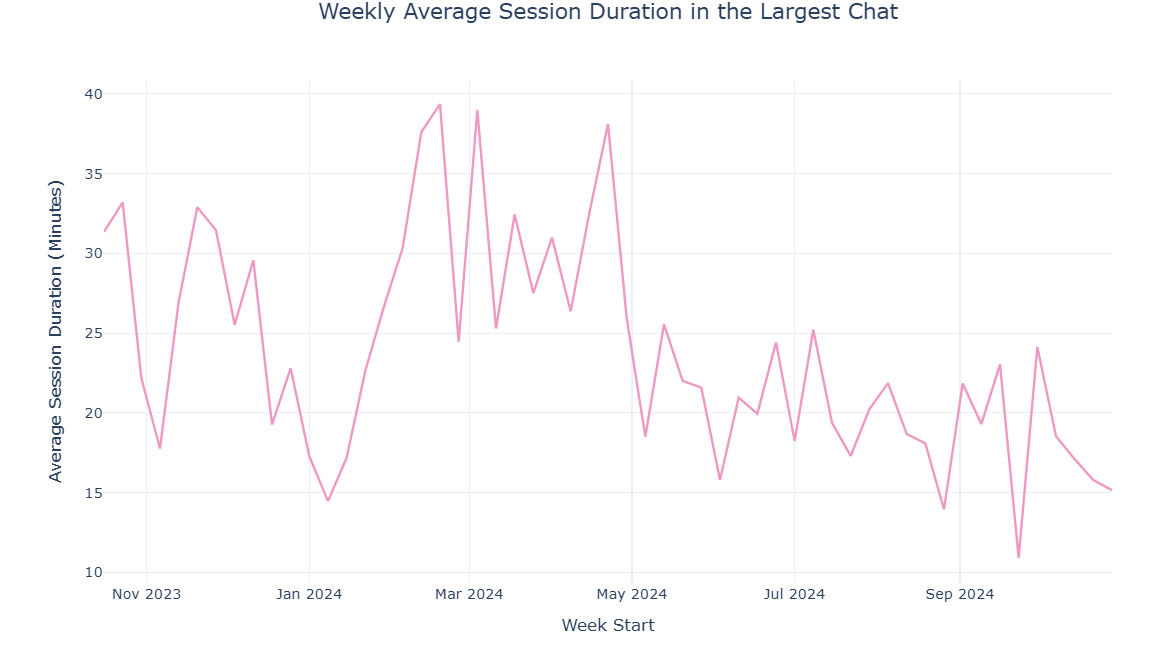

## Sleep duration based on Telegram activity & my last messages of the day

### Analysis of weekly average sleep duration (weekly) based on Telegram activity

In [48]:
my_messages = private_df.loc[private_df['from_id'] == my_id].copy()
# add a column with the date (without time)
my_messages['date_only'] = my_messages['date'].dt.date

# group by day and calculate the first and last message
daily_activity = my_messages.groupby('date_only').agg(
    first_message=('date', 'min'),  # earliest message of the day
    last_message=('date', 'max')   # latest message of the day
).reset_index()

# calculate time between first and last message
daily_activity['active_hours'] = (
    (daily_activity['last_message'] - daily_activity['first_message']).dt.total_seconds() / 3600
)

# add the next day's first message for sleep calculation
daily_activity['next_first_message'] = daily_activity['first_message'].shift(-1)
# calculate sleep hours (time between the last message of the day and the first message of the next day)
daily_activity['sleep_hours'] = (
    (daily_activity['next_first_message'] - daily_activity['last_message']).dt.total_seconds() / 3600
)
# remove the last day as it doesn't have a next first message
daily_activity = daily_activity[:-1]
daily_activity['date_only'] = pd.to_datetime(daily_activity['date_only'])

# filter data
daily_activity = daily_activity[daily_activity['date_only'] >= '2024-01-01']

# add a week column for grouping
daily_activity['week'] = daily_activity['date_only'] - pd.to_timedelta(daily_activity['date_only'].dt.weekday, unit='d')

# calculate average sleep hours per week
weekly_sleep = daily_activity.groupby('week')['sleep_hours'].mean().reset_index()

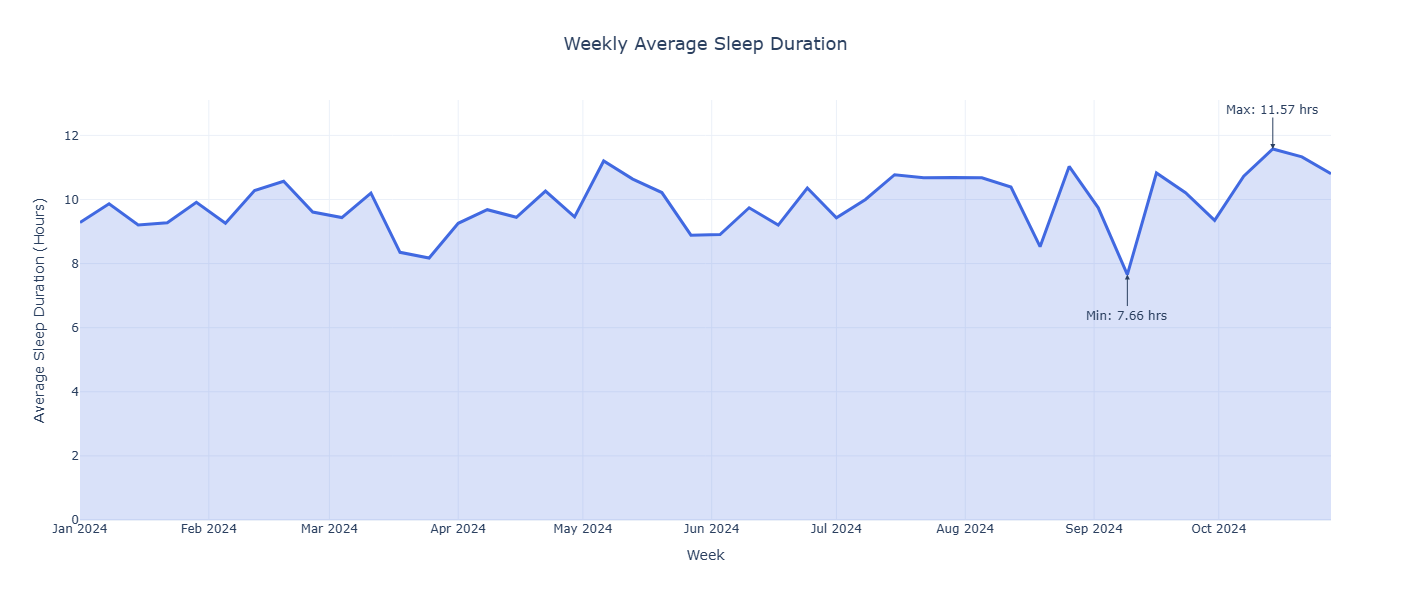

Average sleep duration: 9.88 hours


In [49]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=weekly_sleep['week'],
        y=weekly_sleep['sleep_hours'],
        mode='lines',
        fill='tozeroy',
        line=dict(color='royalblue', width=3),
        fillcolor='rgba(65, 105, 225, 0.2)',  
        name='Average Sleep Hours'
    )
)

fig.update_layout(
    title="Weekly Average Sleep Duration",
    xaxis_title="Week",
    yaxis_title="Average Sleep Duration (Hours)",
    title_font=dict(size=18),
    title_x=0.5,
    template='plotly_white',
    width=1000,
    height=600
)

max_value = weekly_sleep['sleep_hours'].max()
min_value = weekly_sleep['sleep_hours'].min()
max_week = weekly_sleep.loc[weekly_sleep['sleep_hours'].idxmax(), 'week']
min_week = weekly_sleep.loc[weekly_sleep['sleep_hours'].idxmin(), 'week']

fig.add_annotation(
    x=max_week,
    y=max_value,
    text=f"Max: {max_value:.2f} hrs",
    showarrow=True,
    arrowhead=2,
    ax=0,
    ay=-40
)

fig.add_annotation(
    x=min_week,
    y=min_value,
    text=f"Min: {min_value:.2f} hrs",
    showarrow=True,
    arrowhead=2,
    ax=0,
    ay=40
)

fig.show()
print(f"Average sleep duration: {daily_activity['sleep_hours'].mean():.2f} hours")

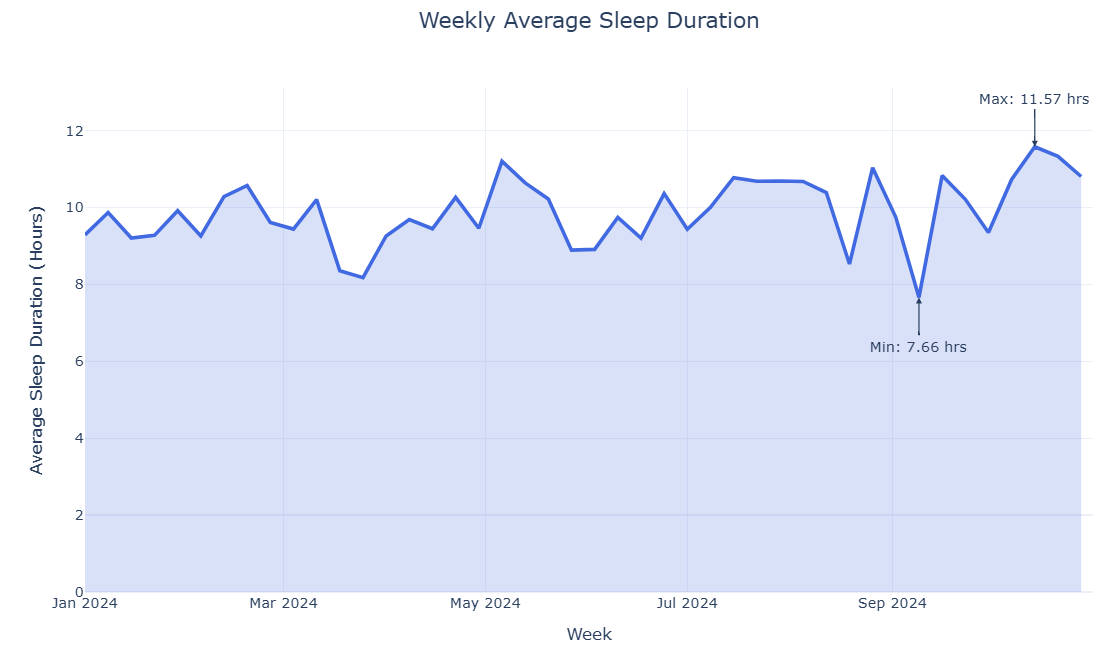

From the graph, we can see that the weekly average sleep duration remains relatively stable, ranging mostly **between 8 and 10 hours**.

Moreover,there could be an underlying seasonal trend, as sleep duration increases during certain months and decreases in others. Research has shown that **people tend to sleep longer during winter months** due to reduced daylight and shorter during summer due to extended daylight hours. The trends in the graph may reflect these natural tendencies.


#### Average sleep duration: 9.88 hours
According to these statistics, I sleep pretty well :) But I often don’t go to bed immediately after writing my last message, so this should be considered an idealized scenario.

### Most frequently sent last messages of the day

In [50]:
last_messages = my_messages.groupby('date_only').agg(
    last_message=('date', 'max'),
    last_message_text=('message', 'last')
).reset_index()
# last_messages

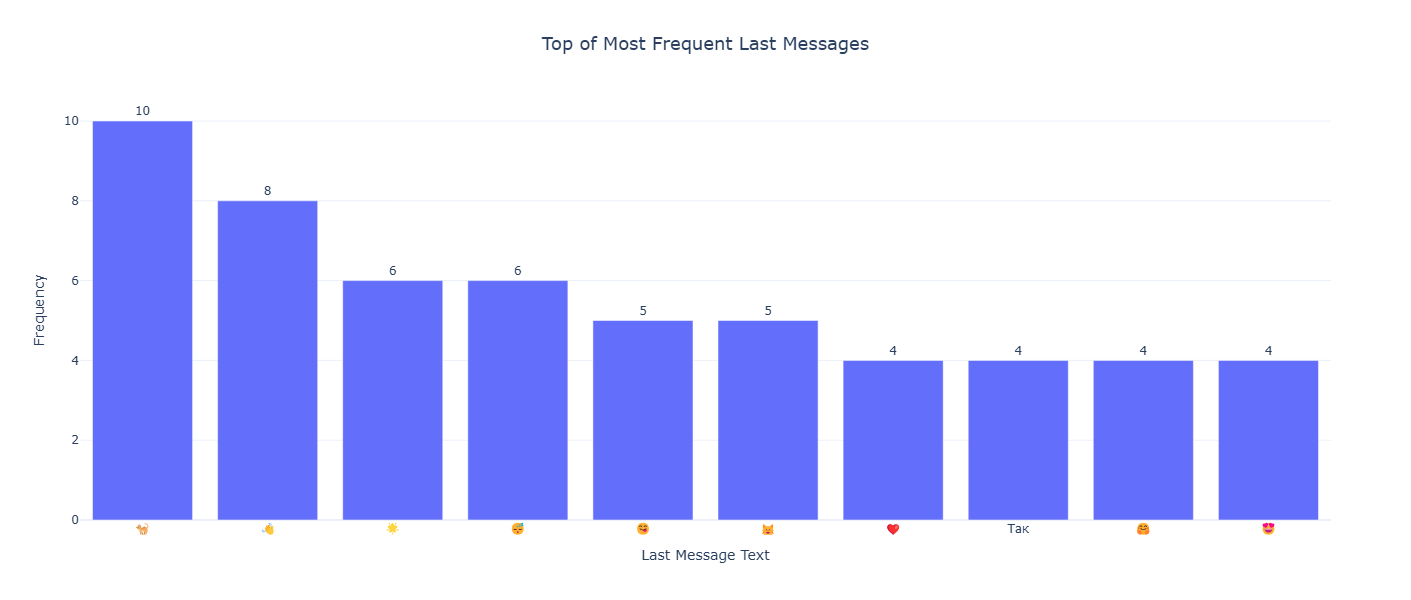

In [51]:
message_counts = last_messages['last_message_text'].value_counts().reset_index()
message_counts.columns = ['last_message_text', 'count']

top_message_counts = message_counts.head(10)

fig = px.bar(
    top_message_counts,
    x='last_message_text',
    y='count',
    title='Top of Most Frequent Last Messages',
    labels={'last_message_text': 'Last Message Text', 'count': 'Frequency'},
    template='plotly_white',
    text='count'
)

fig.update_traces(
    texttemplate='%{text:.0f}', 
    textposition='outside',
    # marker_color=repeated_colors
)

fig.update_layout(
    xaxis_title="Last Message Text",
    yaxis_title="Frequency",
    title_font=dict(size=18),
    title_x=0.5,
    width=1000,
    height=600,
)

fig.show()

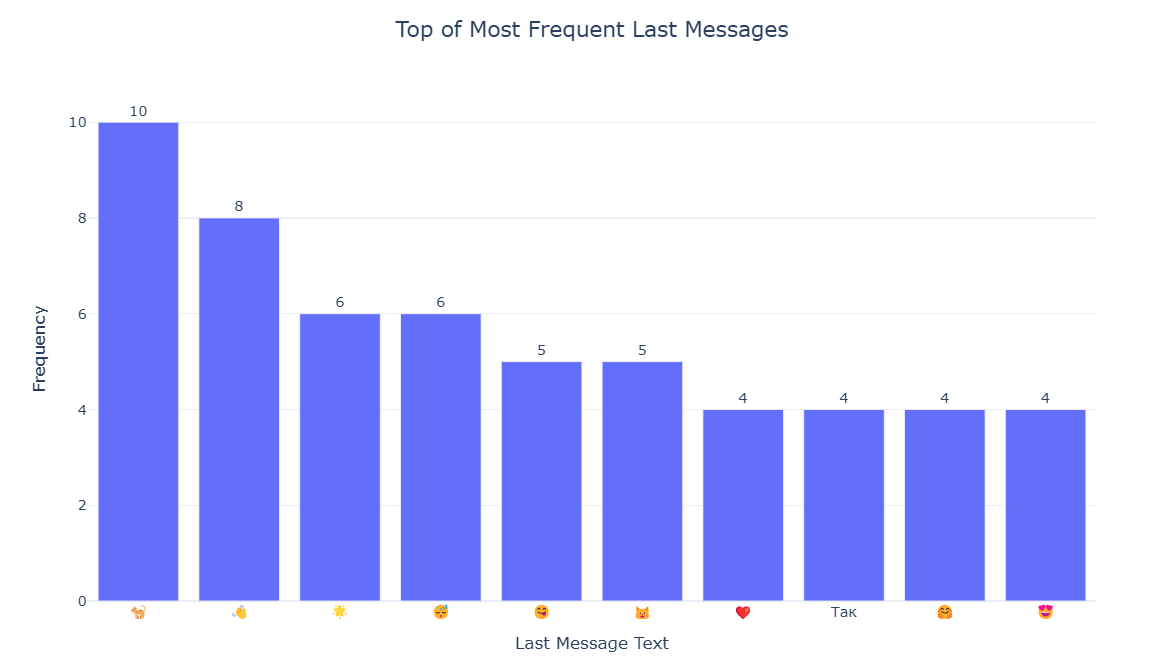

This chart showcases **the most frequent messages** I send as the last ones of the day in Telegram. It provides insight into my typical communication style when wrapping up conversations. As evident, the majority of these messages are **stickers**, which makes sense as Telegram often links emoji to stickers for seamless usage.

One interesting observation is the prevalence of stickers featuring cats or sleepy themes. This aligns with my habit of pairing a "goodnight" message with a cat sticker or something depicting a sleepy vibe. It’s clear from the chart that my last messages often carry a lighthearted or comforting tone, reflecting my tendency to add a personal and warm touch to end-of-day conversations.

## Message length analysis

### Analysis of the average message length sent in 2024

In [52]:
def clean_message(text):
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^\w\s]', '', text) 
    text = re.sub(r'\s+', ' ', text).strip()
    return text

merged_df['message'] = merged_df['message'].astype(str)
text_messages = merged_df.loc[merged_df['type_x'] == 'text'].copy()  
text_messages['cleaned_message'] = text_messages['message'].apply(clean_message)

In [53]:
my_messages = text_messages.loc[text_messages['from_id'] == my_id].copy()
my_messages['date'] = pd.to_datetime(my_messages['date'], errors='coerce')
my_messages['date_only'] = my_messages['date'].dt.date
my_messages_2024 = my_messages.loc[my_messages['date'].dt.year == 2024].copy()
my_messages_2024['message_length'] = my_messages_2024['cleaned_message'].apply(len)
daily_length_2024 = my_messages_2024.groupby('date_only')['message_length'].mean().reset_index()

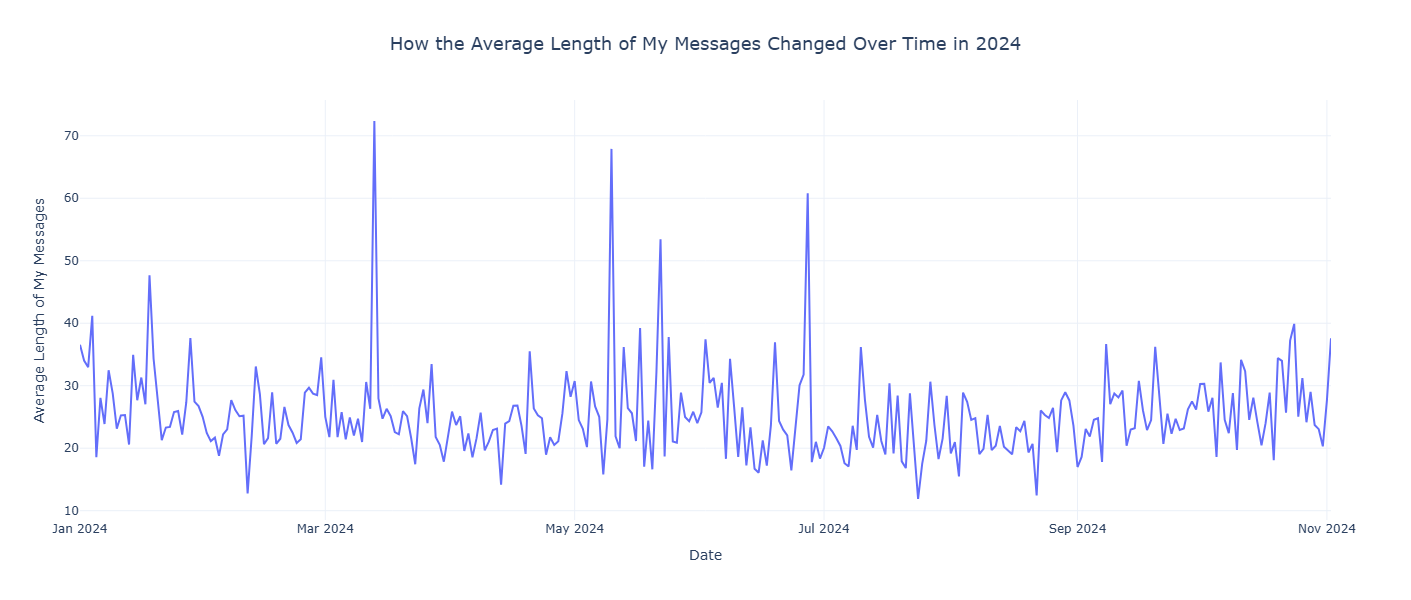

In [54]:
fig = px.line(
    daily_length_2024,
    x='date_only',
    y='message_length',
    title='How the Average Length of My Messages Changed Over Time in 2024',
    labels={'date_only': 'Date', 'message_length': 'Average Length'},
    template='plotly_white'
)
# fig.update_traces(line_color='#EE99C2')

fig.update_layout(
    xaxis_title="Date",
    yaxis_title="Average Length of My Messages",
    title_font=dict(size=18),
    title_x=0.5,
    width=1000,
    height=600
)

fig.show()

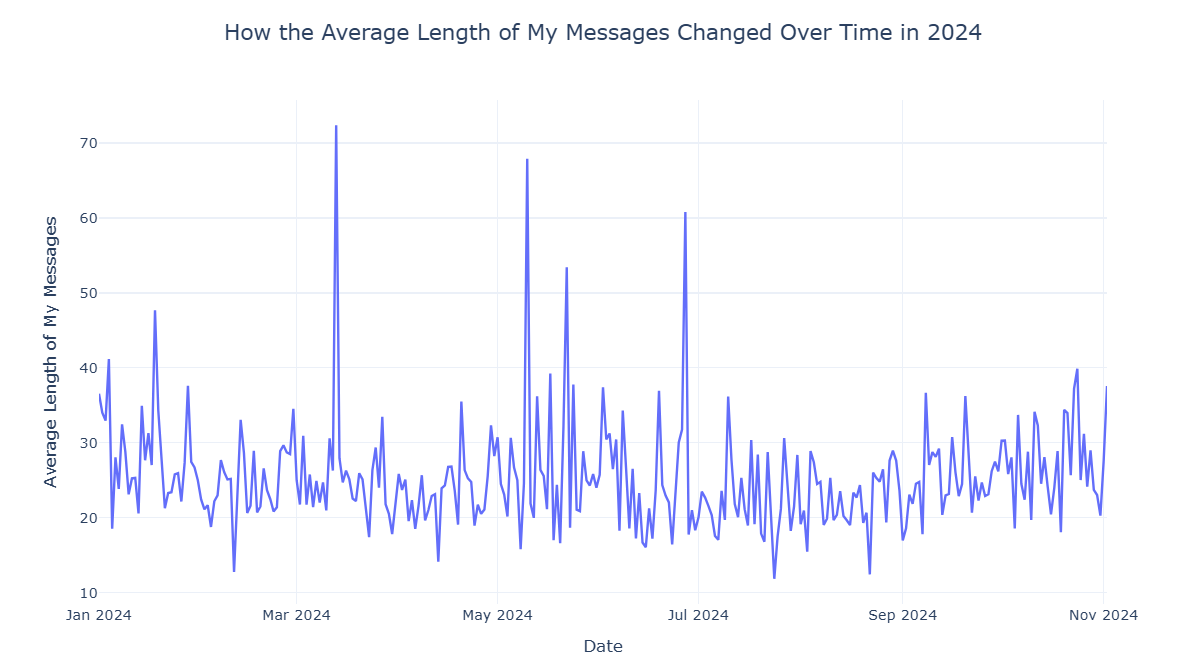

This graph illustrates the fluctuation in the average length of my messages (measured in characters) sent in Telegram chats throughout **2024**. While the average length remains relatively stable over time, ranging mostly **between 20 and 40 characters**, there are occasional spikes indicating much longer messages. A few significant peaks suggest days when longer, perhaps more detailed or elaborate messages were sent. These could correlate with specific events, conversations, or activities requiring more explanation or interaction.

## Telegram group chat analysis

### Analysis of the largest groups by number of users

In [55]:
group_data = df_meta[df_meta['type'] == 'Group']
group_user_counts = group_data.groupby('dialog_id').size().reset_index(name='user_count')

group_user_counts = group_user_counts.merge(
    group_data[['dialog_id', 'name']].drop_duplicates(),
    on='dialog_id',
    how='left'
)

group_user_counts = group_user_counts.sort_values(by='user_count', ascending=False)

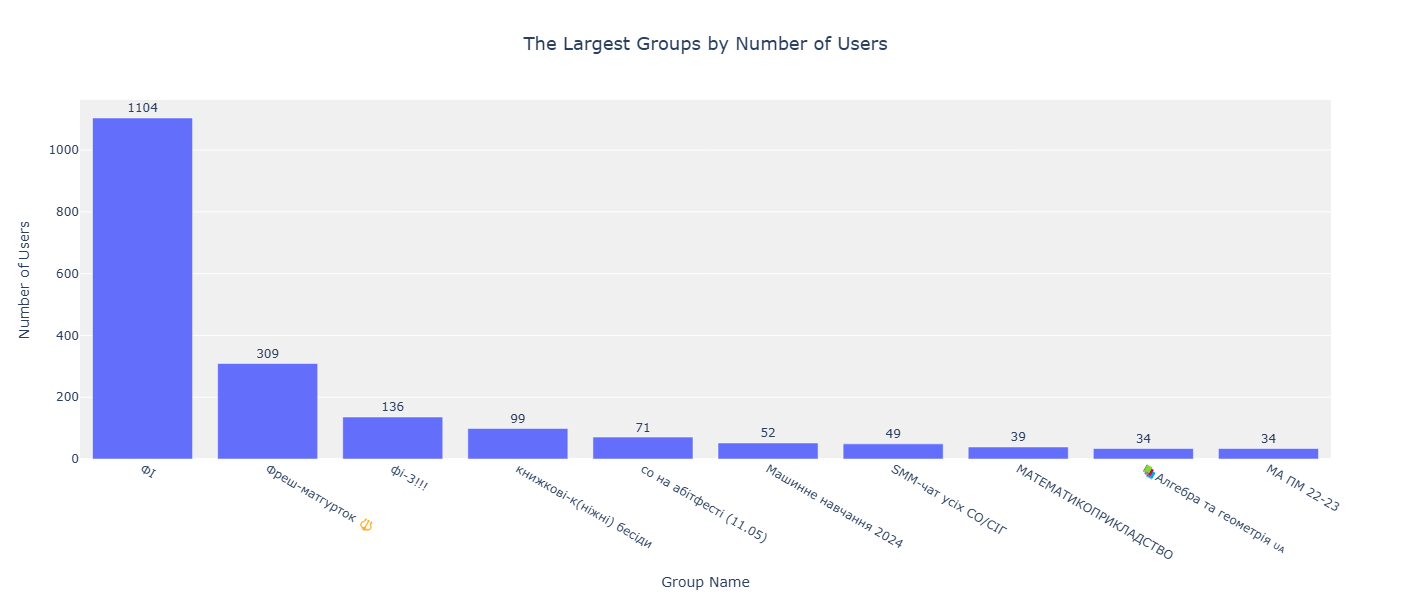

In [56]:
top_groups = group_user_counts.head(10)

fig = px.bar(
    top_groups,
    x='name',
    y='user_count',
    title='The Largest Groups by Number of Users',
    labels={'name': 'Group Name', 'user_count': 'Number of Users'},
    template='plotly_white',
    text='user_count'
)

fig.update_traces(
    texttemplate='%{text}', 
    textposition='outside',
    # marker_color=repeated_colors
)

fig.update_layout(
    yaxis=dict(
        title="Number of Users",
        gridcolor="white",
        zerolinecolor="white"
    ),
    xaxis_title="Group Name",
    title_font=dict(size=18),
    title_x=0.5,
    width=1000,
    height=600,
    plot_bgcolor="rgba(240, 240, 240, 1)"
)

fig.show()

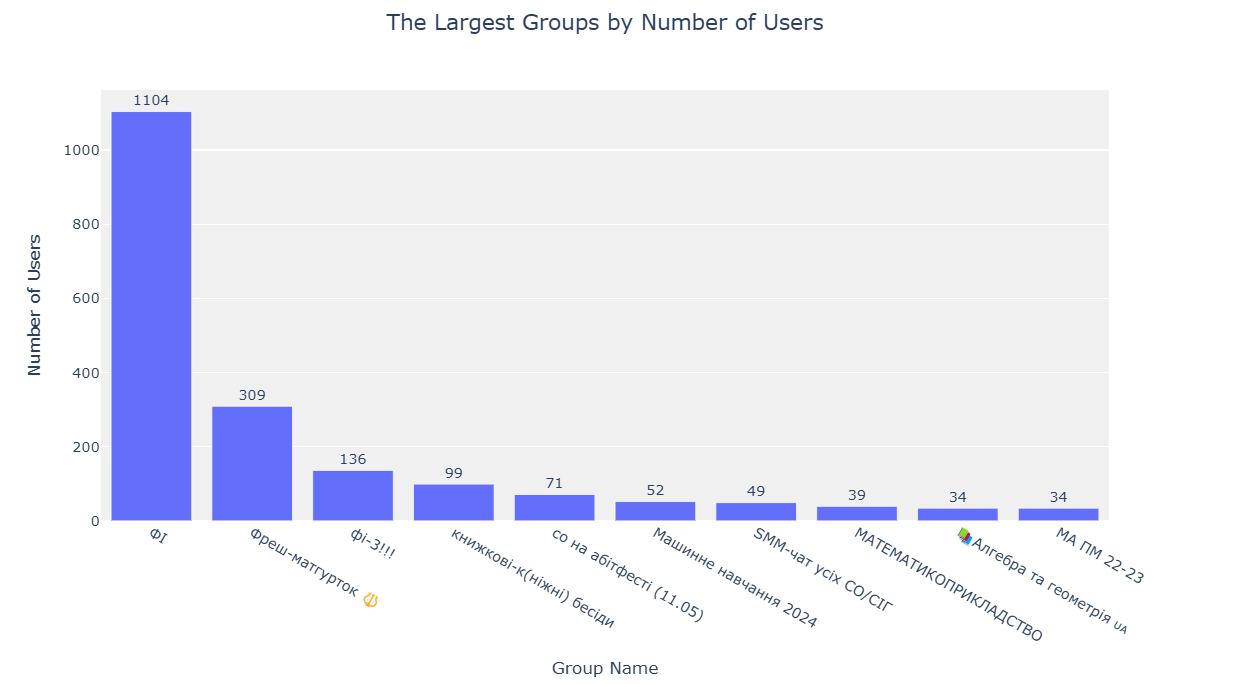

The chart highlights that the majority of activity is concentrated in the faculty chat, which significantly surpasses other groups in the number of users. Other university-related chats also rank among the top, reflecting that these groups currently dominate my interactions and activity.

### Top groups I write the most messages to

In [57]:
my_messages = merged_df[merged_df['from_id'] == my_id]

group_message_counts = (
    my_messages[my_messages['type_y'] == 'Group']
    .groupby('dialog_id')
    .size()
    .reset_index(name='message_count')
    .merge(merged_df[['dialog_id', 'name']].drop_duplicates(), on='dialog_id', how='left')
    .sort_values(by='message_count', ascending=False)
)

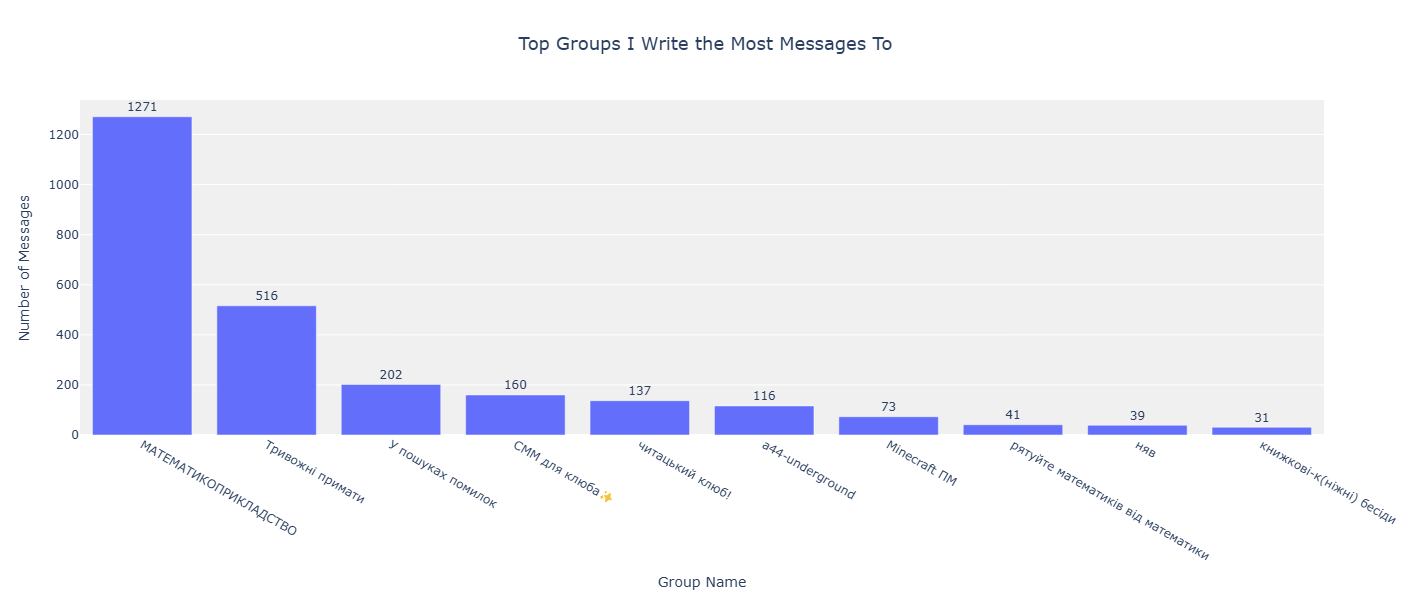

In [58]:
fig = px.bar(
    group_message_counts.head(10), 
    x='name',
    y='message_count',
    title='Top Groups I Write the Most Messages To',
    labels={'name': 'Group Name', 'message_count': 'Number of Messages'},
    template='plotly_white',
    text='message_count'
)

fig.update_traces(
    texttemplate='%{text}', 
    textposition='outside',
    # marker_color=repeated_colors
)

fig.update_layout(
    yaxis=dict(
        title="Number of Messages",
        gridcolor="white",
        zerolinecolor="white"
    ),
    xaxis_title="Group Name",
    title_font=dict(size=18),
    title_x=0.5,
    width=1000,
    height=600,
    plot_bgcolor="rgba(240, 240, 240, 1)"
)

fig.show()

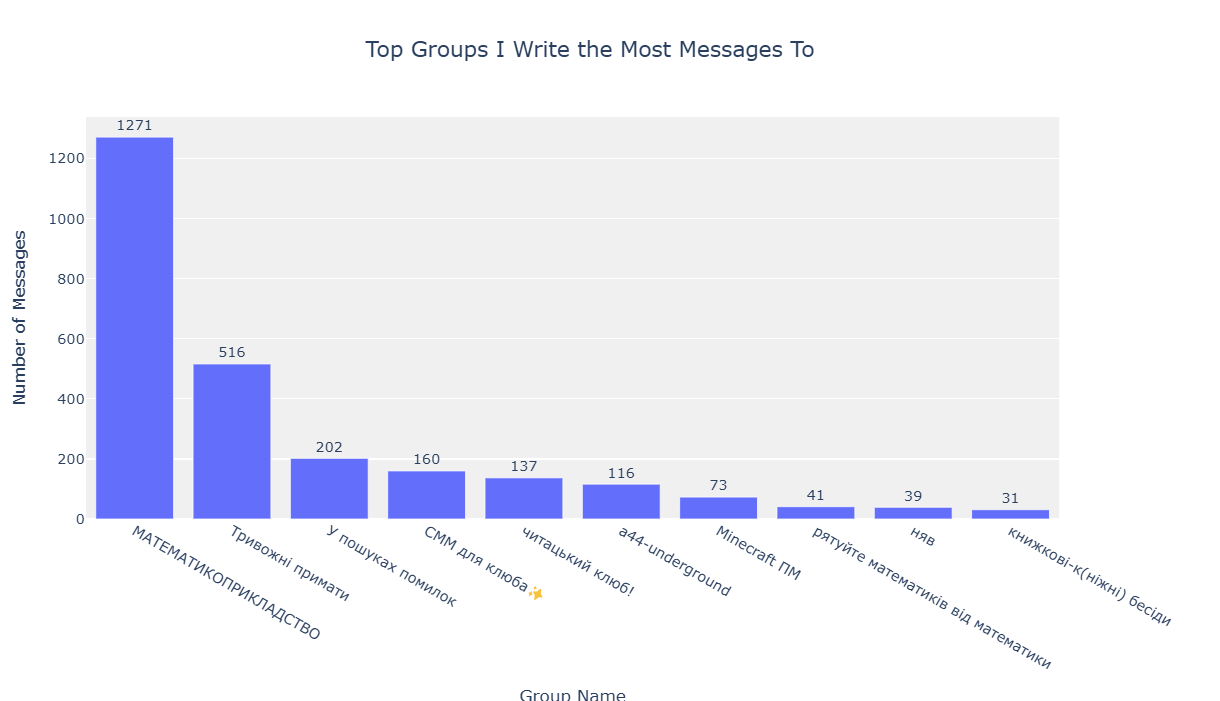

The majority of my messages are sent to university-related chats, with a significant focus on academic and student activity groups. This reflects my current engagement with university communities.

### My activity in group chats over time

In [59]:
my_messages.loc[:, 'date'] = pd.to_datetime(my_messages['date'], errors='coerce')

group_activity = my_messages.loc[my_messages['type_y'] == 'Group'].copy()

group_activity['date_only'] = pd.to_datetime(group_activity['date']).dt.date

daily_group_activity = (
    group_activity
    .groupby('date_only')
    .size()
    .reset_index(name='message_count')
    .sort_values(by='date_only')
)


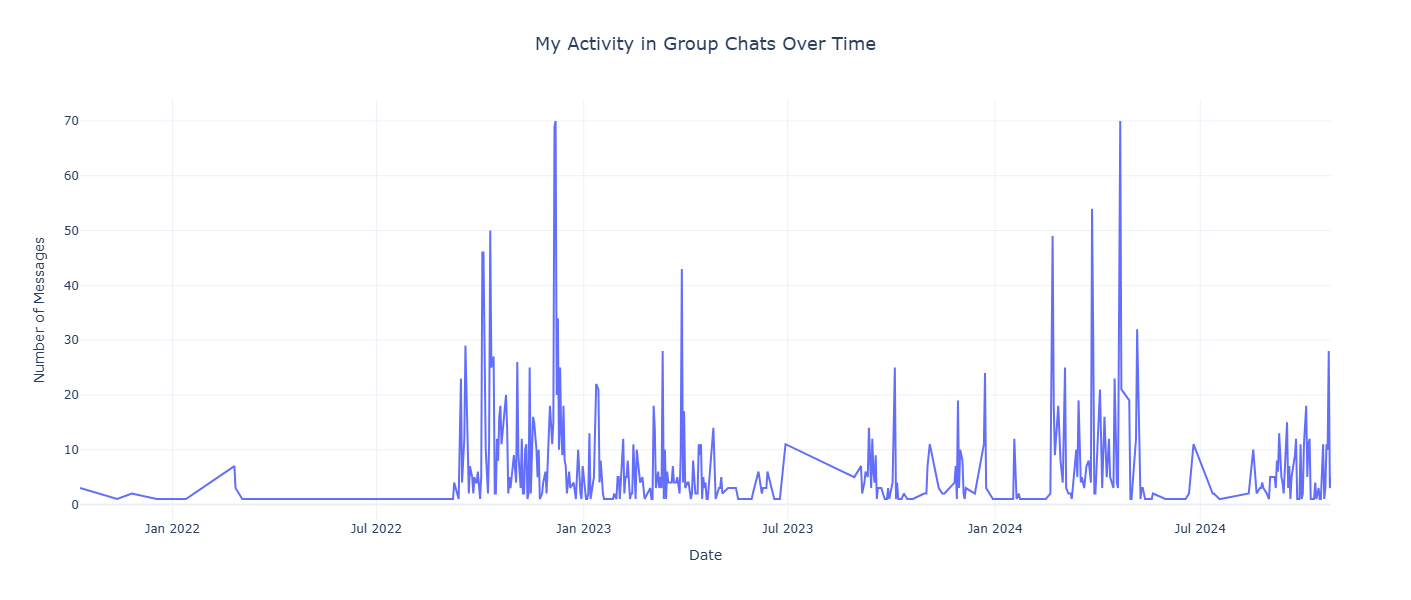

In [60]:
fig = px.line(
    daily_group_activity,
    x='date_only',
    y='message_count',
    title='My Activity in Group Chats Over Time',
    labels={'date_only': 'Date', 'message_count': 'Number of Messages'},
    template='plotly_white'
)

fig.update_layout(
    xaxis_title="Date",
    yaxis_title="Number of Messages",
    title_font=dict(size=18),
    title_x=0.5,
    width=1000,
    height=600,
)

fig.show()

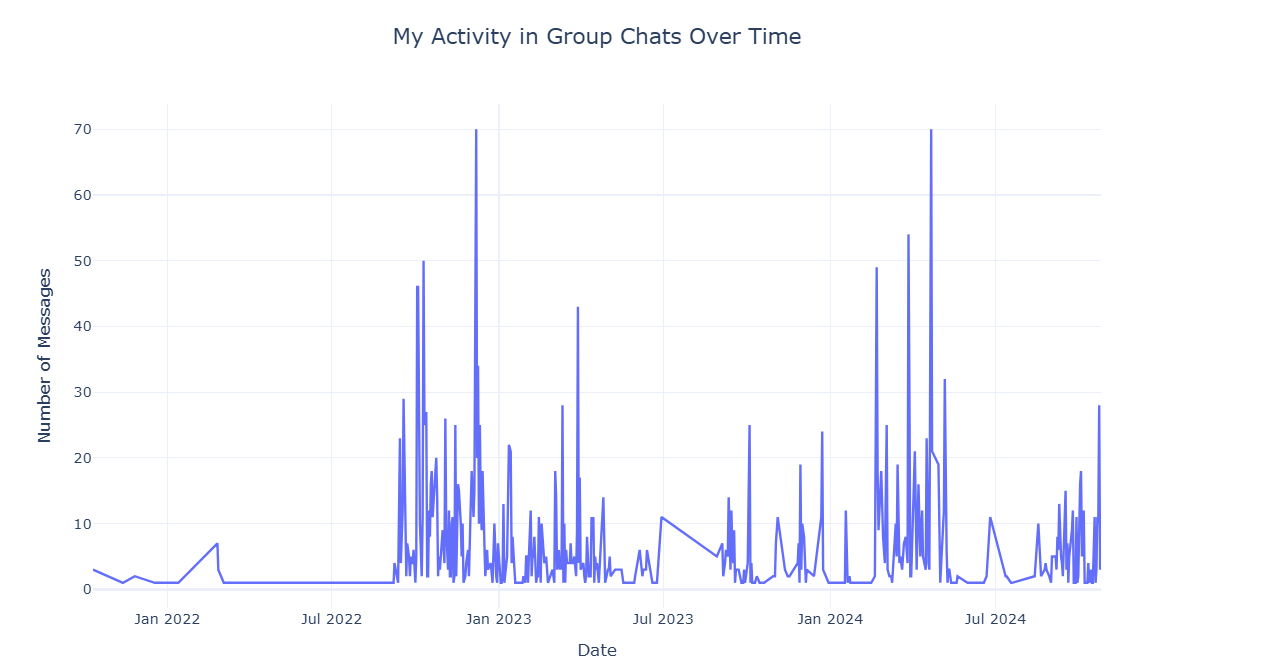

The graph shows that my activity in group chats changes over time, with clear drops during the summer months. This happens because there’s less need to send messages in study-related chats when classes are not in session. On the other hand, activity increases during the university period, especially during busy times like semesters and exams. This pattern shows that my messaging in group chats is mostly connected to my academic schedule.

### Analysis of the most active Telegram groups by weekly engagement

In [61]:
merged_df['date'] = pd.to_datetime(merged_df['date'], errors='coerce')
group_messages = merged_df[merged_df['type_y'] == 'Group']
cutoff_date = pd.Timestamp(datetime.now() - timedelta(days=200), tz='UTC')
recent_activity = group_messages[group_messages['date'] >= cutoff_date]
active_groups = recent_activity['dialog_id'].unique()
group_messages = group_messages[group_messages['dialog_id'].isin(active_groups)]

group_messages['week'] = group_messages['date'].dt.to_period('W').apply(lambda r: r.start_time)

group_activity_summary = (
    group_messages
    .groupby(['dialog_id', 'week'])
    .size()
    .reset_index(name='weekly_message_count')
    .groupby('dialog_id')['weekly_message_count']
    .mean()
    .reset_index(name='average_activity')
)

group_activity_summary = group_activity_summary.merge(
    merged_df[['dialog_id', 'name']].drop_duplicates(),
    on='dialog_id',
    how='left'
).sort_values(by='average_activity', ascending=False)

top_10_groups = group_activity_summary.head(10)

C:\Users\User\AppData\Local\Temp\ipykernel_20236\447087465.py:8: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



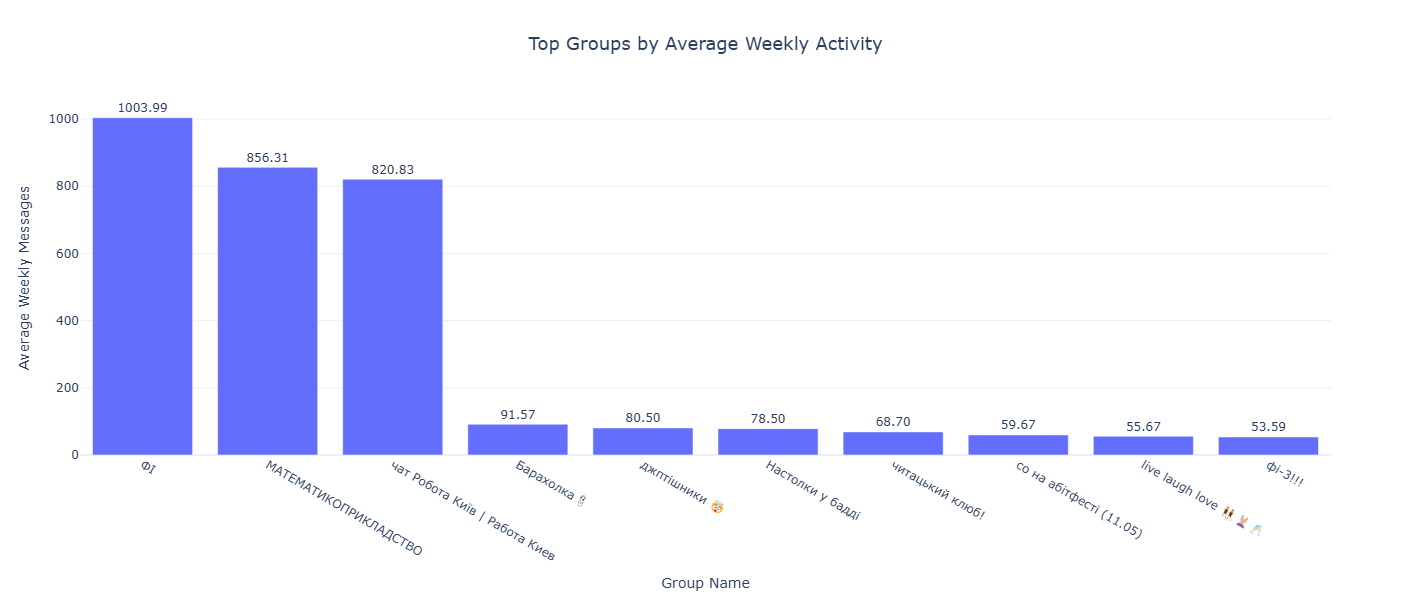

In [62]:
fig = px.bar(
    top_10_groups,
    x='name',
    y='average_activity',
    title='Top Groups by Average Weekly Activity',
    labels={'name': 'Group Name', 'average_activity': 'Average Weekly Messages'},
    template='plotly_white',
    text='average_activity'
)

repeated_colors = [colors[i % len(colors)] for i in range(len(top_10_groups))]
fig.update_traces(
    # marker_color=repeated_colors,
    texttemplate='%{text:.2f}', 
    textposition='outside'
)
fig.update_layout(
    xaxis_title="Group Name",
    yaxis_title="Average Weekly Messages",
    title_font=dict(size=18),
    title_x=0.5,
    width=1000,
    height=600,
)

fig.show()

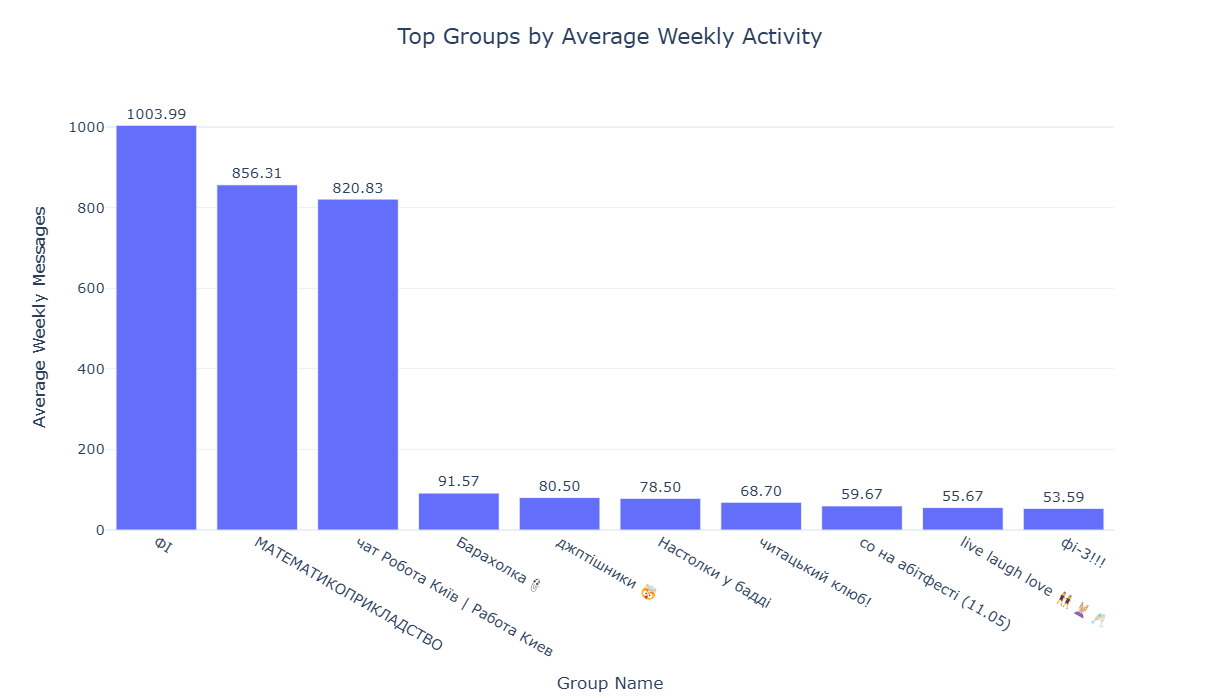

This chart highlights the most active groups in my Telegram chats based on their average weekly activity.

## Telegram channel analysis

### Channel Categorization by Themes

I previously prepared a dataframe with categorized channels by topic.

In [63]:
file_path = "df_meta_channels.csv"
df_meta_channels = pd.read_csv(file_path)

In [64]:
# df_meta_channels

In [65]:
unique_channels = df_meta_channels.drop_duplicates(subset=['name'])

category_counts = unique_channels['category'].value_counts().reset_index()
category_counts.columns = ['Category', 'Channel Count']

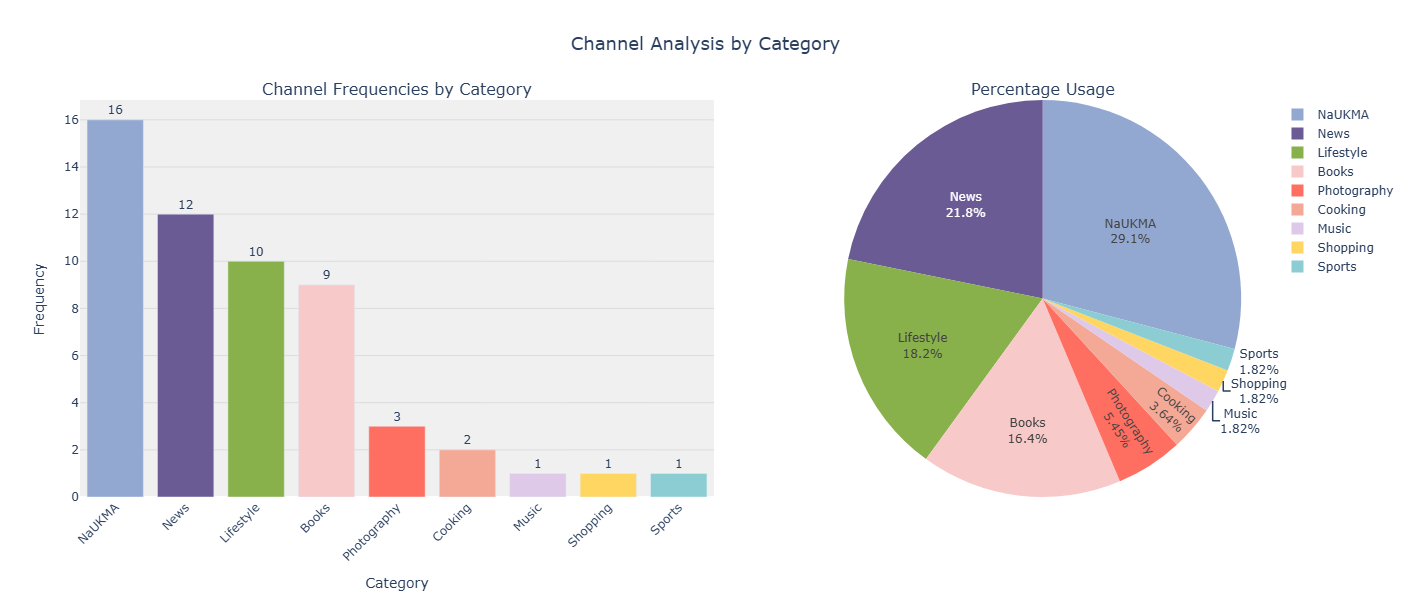

In [66]:
colors = ['#92A8D1', '#6B5B95', '#88B04B', '#F7CAC9', '#FF6F61', '#F4A896', '#DEC9E9',
          '#FFD662', '#8CCCD3', '#8CCCD3', '#E2A4B8', '#74C365', '#FFA07A', '#FFDAB9', '#E6E6FA', '#6495ED']
repeated_colors = [colors[i % len(colors)] for i in range(len(category_counts))]

percentages = [count / category_counts['Channel Count'].sum() * 100 for count in category_counts['Channel Count']]

fig = make_subplots(
    rows=1, cols=2,
    column_widths=[0.6, 0.4], 
    specs=[[{'type': 'xy'}, {'type': 'domain'}]], 
    subplot_titles=["Channel Frequencies by Category", "Percentage Usage"]
)

fig.add_trace(
    go.Bar(
        x=category_counts['Category'],
        y=category_counts['Channel Count'],
        text=category_counts['Channel Count'],
        textposition='outside',
        marker_color=repeated_colors,
        showlegend=False
    ),
    row=1, col=1
)

fig.update_xaxes(
    title_text="Category",
    title_font=dict(size=14),
    tickangle=-45
)

fig.update_yaxes(
    title_text="Frequency",  
    title_font=dict(size=14),
    showgrid=True,
    gridcolor='rgba(200, 200, 200, 0.5)' 
)

fig.add_trace(
    go.Pie(
        labels=category_counts['Category'],
        values=percentages,
        marker=dict(colors=repeated_colors),
        textinfo='label+percent',
        hoverinfo='label+percent',
    ),
    row=1, col=2
)

fig.update_layout(
    title="Channel Analysis by Category",
    title_font=dict(size=18),
    title_x=0.5,
    plot_bgcolor='rgba(240, 240, 240, 1)',
    showlegend=True,
    height=600,
    width=1300,
)

fig.show()

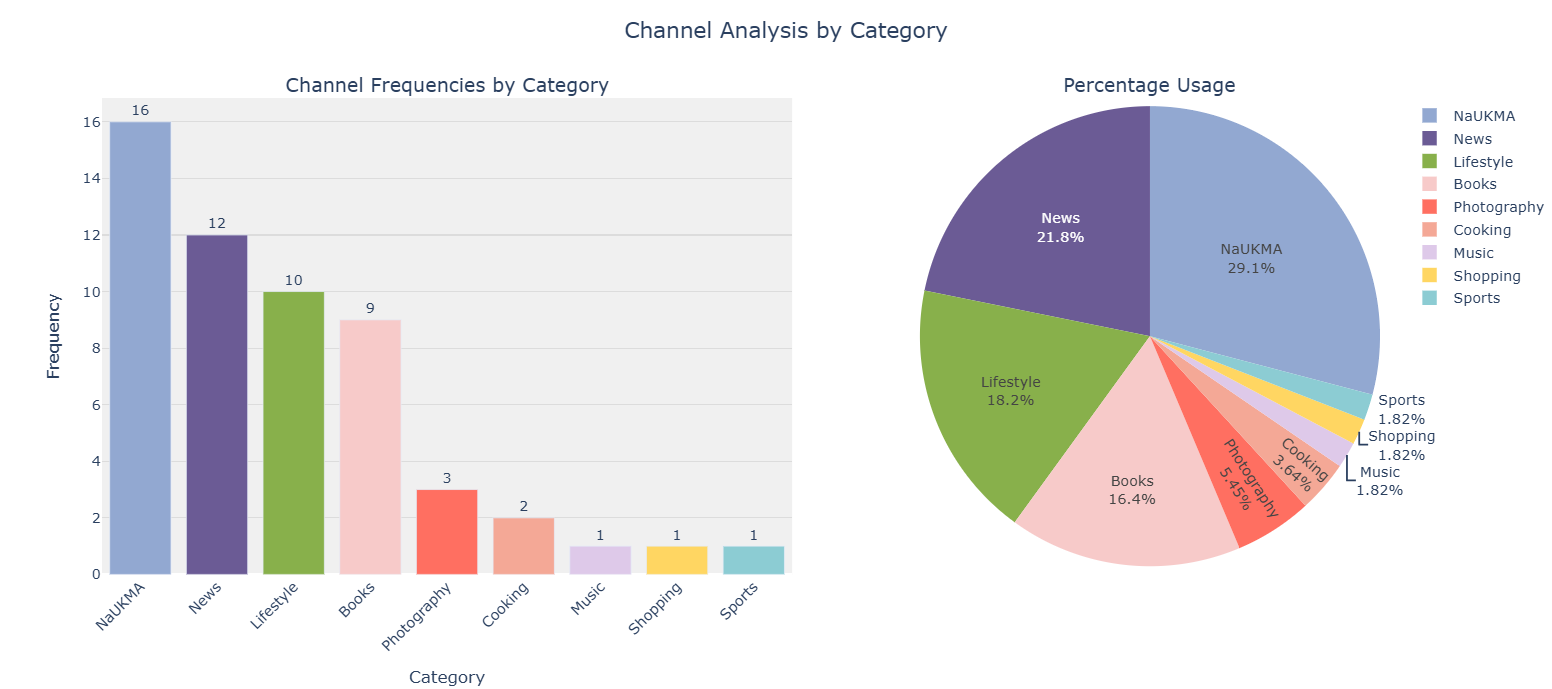

The chart shows the distribution of channels I follow by category. The largest portion, "NaUKMA," represents university-related channels. These are essential for me to stay updated on academic news and events. The next category, "News," mostly consists of political channels and covers what's happening in Ukraine, which is important to me.

Following that are channels that reflect my personal interests. "Lifestyle" channels often include my friends sharing about their lives, while "Books" channels highlight my love for literature. Other categories, like "Photography," "Cooking," and "Music," represent my general hobbies and passions, adding variety to the content I engage with.

## Analysis of categorized chats by gender

### Do I communicate more with women or men? (by categorized chats)

I have prepared a dataset with categorized private chats by gender in advance.

In [67]:
file_path = "df_merged_private.csv"
df_private_gender = pd.read_csv(file_path)

In [68]:
# df_private_gender

In [69]:
unique_gender_data = df_private_gender.drop_duplicates(subset=['name'])
gender_distribution = unique_gender_data['gender'].value_counts().reset_index()
gender_distribution.columns = ['Gender', 'Count']
gender_distribution['Gender'] = gender_distribution['Gender'].replace('other', 'Undefined')
gender_distribution['Gender'] = gender_distribution['Gender'].replace('female', 'Women')
gender_distribution['Gender'] = gender_distribution['Gender'].replace('male', 'Men')

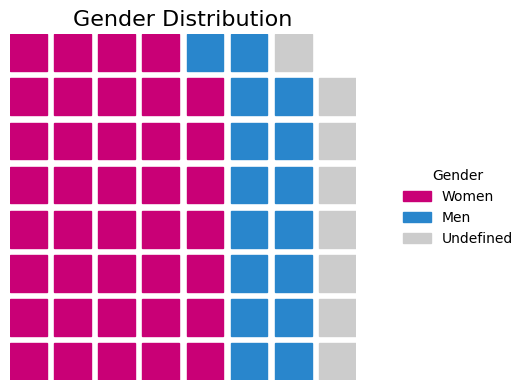

In [70]:
data = gender_distribution.set_index('Gender')['Count'].to_dict()

waffle_colors = ['#c90076', '#2986cc', '#cccccc']

fig = plt.figure(
    FigureClass=Waffle,
    rows=8,
    values=data,
    colors=waffle_colors,
    title={'label': 'Gender Distribution', 'loc': 'center', 'fontsize': 16},
    legend={
        'loc': 'center left',
        'bbox_to_anchor': (1.1, 0.5),
        'title': 'Gender',
        'frameon': False
    },
    figsize=(8, 4)
)

plt.tight_layout()
plt.show()

In [71]:
colors = ['#c90076', '#2986cc', '#cccccc']

fig = make_subplots(
    rows=1, cols=2,
    column_widths=[0.6, 0.4],
    specs=[[{'type': 'xy'}, {'type': 'domain'}]],
    subplot_titles=["Gender Distribution (counts)", "Gender Distribution (percentage)"]
)

fig.add_trace(
    go.Bar(
        x=gender_distribution['Gender'],
        y=gender_distribution['Count'],
        text=gender_distribution['Count'],
        textposition='outside',
        marker_color=colors[:len(gender_distribution)],
        showlegend=False
    ),
    row=1, col=1
)

fig.update_xaxes(title_text="Gender", title_font=dict(size=14))
fig.update_yaxes(title_text="Count", title_font=dict(size=14), showgrid=True, gridcolor='rgba(200, 200, 200, 0.5)')

fig.add_trace(
    go.Pie(
        labels=gender_distribution['Gender'],
        values=gender_distribution['Count'],
        marker=dict(colors=colors[:len(gender_distribution)]),
        textinfo='label+percent',
        hoverinfo='label+percent',
    ),
    row=1, col=2
)

fig.update_layout(
    title="Gender Distribution in Private Dialogs",
    title_font=dict(size=18),
    title_x=0.5,
    plot_bgcolor='rgba(240, 240, 240, 1)',
    showlegend=True,
    height=600,
    width=1200,
)

fig.show()

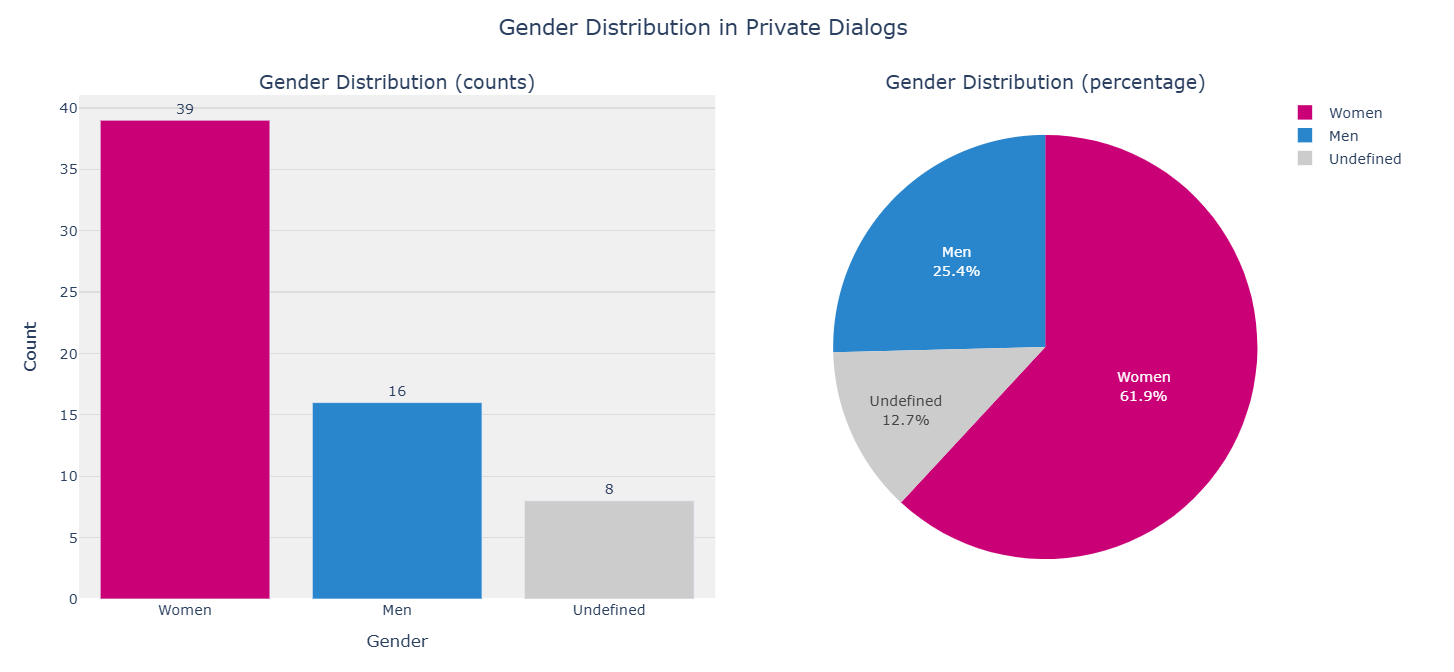

The chart illustrates the gender distribution in my private dialogs. It is clear that I communicate more frequently with women, who make up 61.9% of my conversations. This includes both work-related interactions and friendly chats. Conversations with men account for 25.4%.

The "undefined" category, making up 12.7%, consists primarily of Telegram bots and other chats that could not be classified as male or female. This highlights a significant portion of automated or non-human interactions within my private dialogs. Overall, the data reflects a strong tendency toward communication with women in both professional and personal contexts.

#### Why is the distribution like this? Read below for insights from social psychology.

- Research in social psychology suggests that people often prefer to communicate and form friendships with individuals of the same gender. This phenomenon is known as **"homosociality,"** and it manifests across different cultures and age groups.

According to a study conducted by **Suzanne Rose**, men and women aged 20 to 28 evaluated their friendships with same-gender and opposite-gender individuals. The results showed that both genders preferred same-gender friendships, perceiving them as more beneficial and loyal compared to opposite-gender friendships.

*Source: (Same- and cross-sex friendships and the psychology of homosociality) https://link.springer.com/article/10.1007/BF00288037*

### How does the trend of communication (by gender) change over time?

In [72]:
df_private_gender['date'] = pd.to_datetime(df_private_gender['date'], errors='coerce')
df_private_gender['date'] = df_private_gender['date'].dt.tz_localize(None)  # Drop timezone

df_filtered = df_private_gender[df_private_gender['date'] >= '2023-01-01'].copy()
df_filtered['week'] = df_filtered['date'].dt.to_period('W')

weekly_activity = df_filtered.groupby(['week', 'gender']).agg(
    total_messages=('message', 'count')
).reset_index()

weekly_activity['week'] = weekly_activity['week'].dt.to_timestamp()

male_activity = weekly_activity[weekly_activity['gender'] == 'male']
female_activity = weekly_activity[weekly_activity['gender'] == 'female']

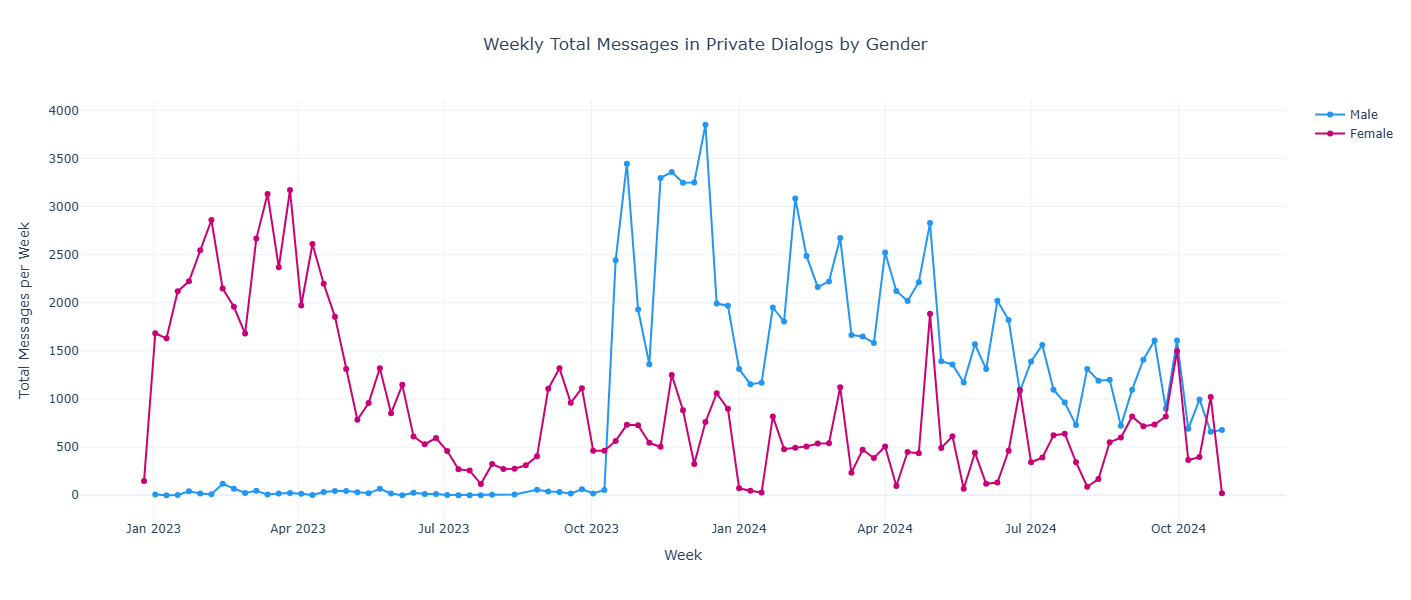

In [73]:
fig = go.Figure()

colors = ['#c90076', '#2986cc', '#cccccc']

fig.add_trace(go.Scatter(
    x=male_activity['week'],
    y=male_activity['total_messages'],
    mode='lines+markers',
    name='Male',
    line=dict(color='#2196F3'),
    marker=dict(size=6)
))

fig.add_trace(go.Scatter(
    x=female_activity['week'],
    y=female_activity['total_messages'],
    mode='lines+markers',
    name='Female',
    line=dict(color='#c90076'),
    marker=dict(size=6)
))

fig.update_layout(
    title="Weekly Total Messages in Private Dialogs by Gender",
    xaxis_title="Week",
    yaxis_title="Total Messages per Week",
    title_x=0.5,
    template="plotly_white",
    height=600,
    width=1200,
)

fig.show()

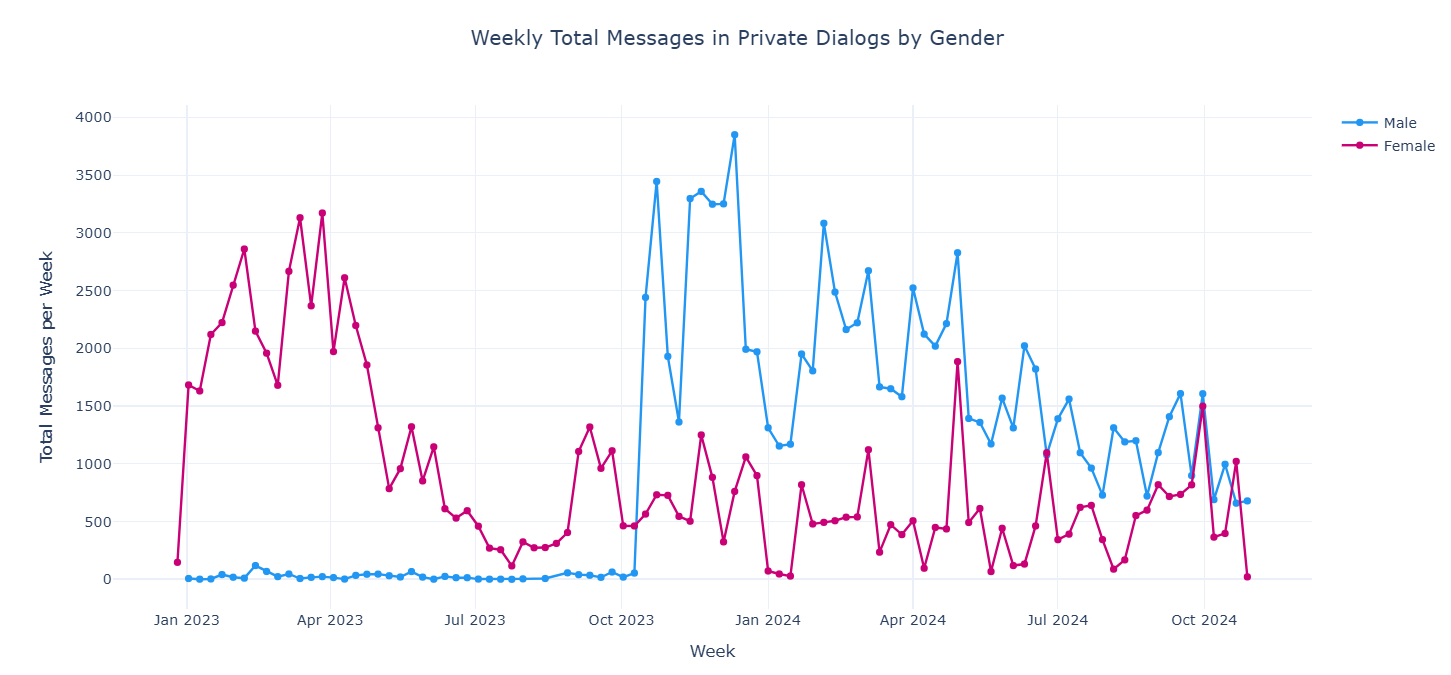

This graph shows the weekly total messages in private dialogs by gender over time. Around late 2023, there was a significant increase in messages with male contacts, which had previously been minimal. Since then, the communication has remained consistent and steady.

This change likely reflects the start of a meaningful connection with someone important, which naturally led to more frequent conversations. It highlights how personal relationships can influence communication patterns and bring lasting changes to how we interact.

## NLP (for Analyzing Communication Patterns)

### Most frequently used words in messages (after lemmatization and another preprocessing) 

#### Deleting stopwords

First of all, we need to delete stopwords. I used the **provided dictionaries:** ukrainian_stopwords.txt (https://github.com/SanGreel/tone-dict-ukrainian/blob/master/dicts/ukrainian_stopwords.txt)

In [74]:
# delete stopwords
stopwords_path = "ukrainian_stopwords.txt"
with open(stopwords_path, "r", encoding="utf-8") as file:
    stopwords = set(file.read().splitlines())

In [75]:
# !pip install nltk
import nltk
from nltk.tokenize import word_tokenize

#### Another preprocessing

The `preprocess_message` function processes text messages. It removes punctuation, converts the text to lowercase, tokenizes it into individual words, and filters out stopwords. The result is a list of cleaned and meaningful words from each message.

In [76]:
def preprocess_message(message, stopwords):
    if pd.isnull(message):
        return []    
    message = re.sub(r'[^\w\s]', '', message.lower())
    
    tokens = word_tokenize(message)
    
    filtered_tokens = [word for word in tokens if word not in stopwords]
    
    return filtered_tokens

merged_df['tokens'] = merged_df['message'].apply(lambda x: preprocess_message(x.lower(), stopwords))

#### Lemmatization

`pymorphy2` is a morphological analysis library for the Russian and Ukrainian languages. It is used for tasks like lemmatization, part-of-speech tagging, and word form generation. I use this library for lemmatization.

In [77]:
# !pip install pymorphy2-dicts-uk
from pymorphy2 import MorphAnalyzer
from functools import lru_cache

In [78]:
morph = MorphAnalyzer(lang='uk')

In [79]:
# only private chats
merged_df_private = merged_df[merged_df['type_y'] == 'Private dialog']

In [80]:
@lru_cache(maxsize=10000)
def cached_lemmatize(token):
    return morph.parse(token)[0].normal_form

def lemmatize_tokens_with_cache(tokens):
    return [cached_lemmatize(token) for token in tokens if len(token) > 2]

merged_df_private = merged_df_private.copy()

merged_df_private['lemmas'] = merged_df_private['tokens'].apply(
    lambda tokens_list: lemmatize_tokens_with_cache(tuple(tokens_list)) if isinstance(tokens_list, list) else []
)

In [81]:
my_messages = merged_df_private[(merged_df_private['from_id'] == my_id)]
all_lemmas = [lemma for lemmas_list in my_messages['lemmas'] if isinstance(lemmas_list, list) for lemma in lemmas_list]
overall_word_counts = Counter(all_lemmas)
most_common_overall_words = overall_word_counts.most_common(20)
overall_words_df = pd.DataFrame(most_common_overall_words, columns=['Word', 'Frequency'])

In [82]:
# overall_words_df.to_csv("overall_words_df.csv", index=False, encoding='utf-8')

#### Result after lemmatization

In [83]:
file_path = "overall_words_df.csv"
overall_words_df = pd.read_csv(file_path)

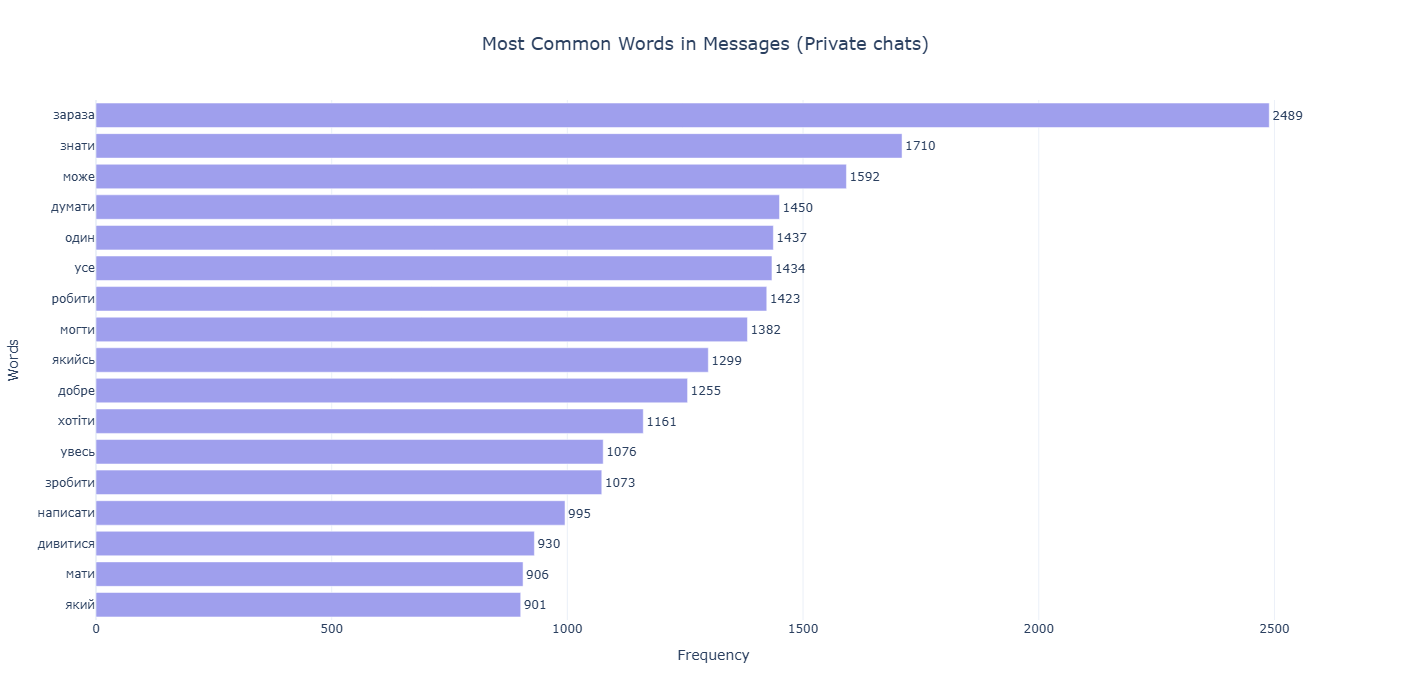

In [84]:
overall_words_df = overall_words_df.iloc[1:21]

fig = px.bar(
    overall_words_df,
    x='Frequency',
    y='Word',
    orientation='h', 
    title='Most Common Words in Messages (Private chats)',
    labels={'Word': 'Words', 'Frequency': 'Frequency'},
    template='plotly_white',
    text='Frequency' 
)

fig.update_traces(
    marker_color='#9F9FED',
    texttemplate='%{text}', 
    textposition='outside'
)

fig.update_layout(
    xaxis_title="Frequency",
    yaxis_title="Words",
    title_font=dict(size=18),
    title_x=0.5,
    width=1200,
    height=700,
    yaxis=dict(autorange='reversed') 
)

fig.show()

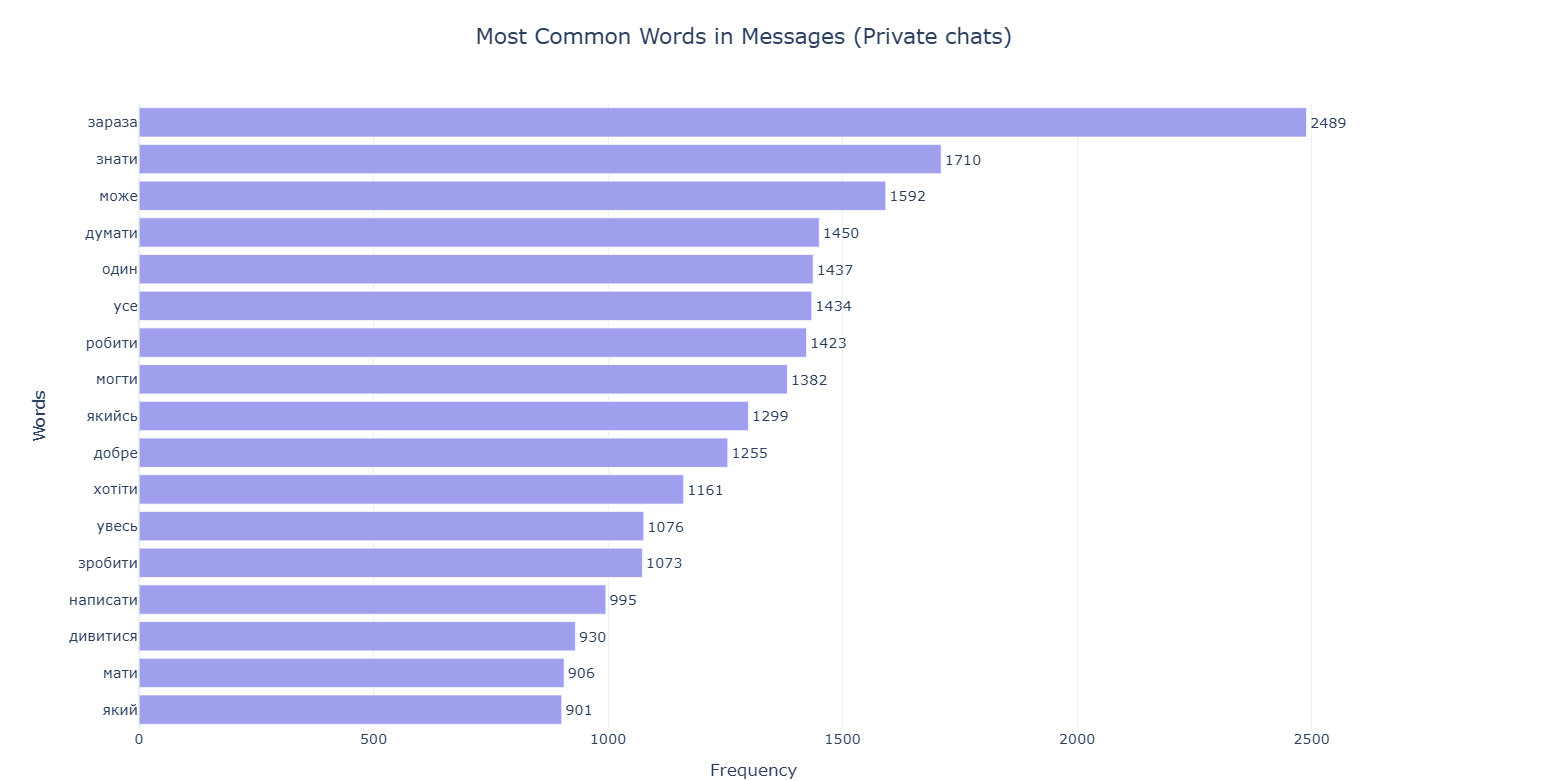

The graph shows the most commonly used words in messages after **lemmatization**. Lemmatization helps by simplifying words to their base form, grouping together variations like verb tenses or plural forms. This makes it easier to see the true patterns in how words are used, without being distracted by different word forms.

### Analyzing the Most Significant Words in Private Conversations Using TF-IDF

#### TF-IDF value

Additionally, I will remove messages containing numbers, as this will improve the results of the TF-IDF analysis.

In [85]:
# merged_df_private

In [86]:
merged_df_private.loc[:, 'lemmas_text'] = merged_df_private['lemmas'].apply(
    lambda lemmas: ' '.join(lemmas) if isinstance(lemmas, list) else ''
)

In [87]:
def clean_text(text):
    return re.sub(r'\d+', '', text)

merged_df_private.loc[:, 'lemmas_text'] = merged_df_private['lemmas_text'].apply(clean_text)

This code computes **TF-IDF scores** for the first 10,000 text messages authored by my id in Telegram (`my_id`). It uses the **TfidfVectorizer** to process and vectorize the `lemmas_text` column and generates a sparse matrix of TF-IDF values. Each row represents a message, and the `tqdm` library is used to track progress during processing.

In [88]:
from sklearn.feature_extraction.text import TfidfVectorizer
from tqdm import tqdm

In [89]:
my_merged_df_private = merged_df_private[merged_df_private['from_id'] == my_id]

In [90]:
def calculate_tfidf(dataframe, column_name, max_features=5000, min_df=2, max_df=0.7, n_messages=10000):

    # select the specified number of messages
    messages = dataframe[column_name].head(n_messages)

    # initialize the TF-IDF vectorizer
    vectorizer = TfidfVectorizer(max_features=max_features, min_df=min_df, max_df=max_df)

    # fit and transform the messages
    tfidf_matrix = vectorizer.fit_transform(messages)
    tfidf_tokens = vectorizer.get_feature_names_out()

    # calculate TF-IDF values for each message
    tfidf_results = []
    for idx, row in enumerate(tqdm(tfidf_matrix.toarray(), desc="Calculating TF-IDF")):
        tfidf_results.append(
            {
                "Message Index": idx,
                "TF-IDF Values": dict(zip(tfidf_tokens, row))
            }
        )

    return tfidf_results

In [91]:
tfidf_results = calculate_tfidf(
    dataframe=my_merged_df_private,
    column_name='lemmas_text',
    max_features=5000,
    min_df=2,
    max_df=0.7,
    n_messages=10000
)

Calculating TF-IDF: 100%|██████████████████████████████████████████████████████| 10000/10000 [00:06<00:00, 1614.96it/s]


Calculating the average TF-IDF scores for all words across the processed messages.

In [92]:
all_tfidf_values = Counter()
for result in tfidf_results:
    for word, value in result["TF-IDF Values"].items():
        all_tfidf_values[word] += value

tfidf_summary = {word: total / len(tfidf_results) for word, total in all_tfidf_values.items()}

sorted_tfidf = sorted(tfidf_summary.items(), key=lambda x: x[1], reverse=True)

top_tfidf_df = pd.DataFrame(sorted_tfidf, columns=['Word', 'Average TF-IDF'])

In [93]:
top_tfidf_words = top_tfidf_df.iloc[1:21]
top_tfidf_words = top_tfidf_words.sort_values(by='Average TF-IDF', ascending=True)

In [94]:
# top_tfidf_words.to_csv("top_tfidf_words.csv", index=False, encoding='utf-8')

#### Visualization

In [95]:
file_path = "top_tfidf_words.csv"
top_tfidf_words = pd.read_csv(file_path)

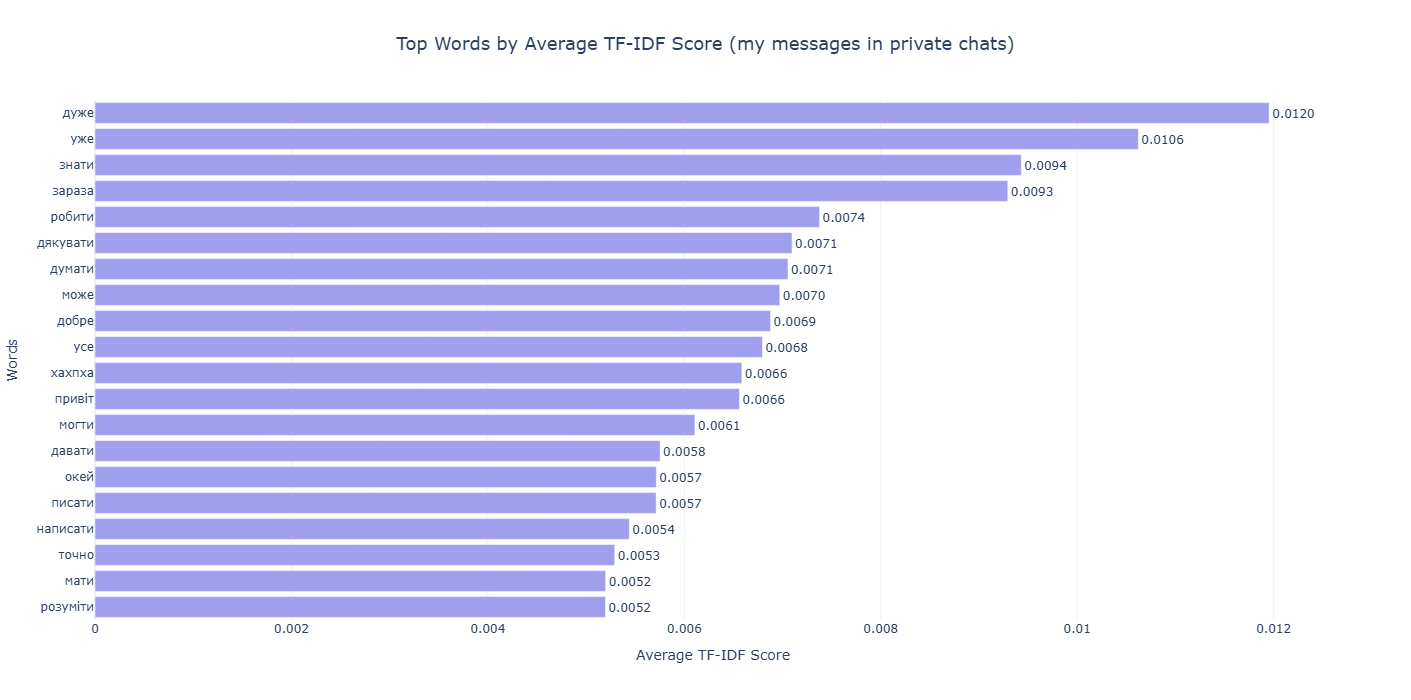

In [96]:
fig = px.bar(
    top_tfidf_words,
    x='Average TF-IDF',
    y='Word',
    orientation='h',
    title='Top Words by Average TF-IDF Score (my messages in private chats)',
    labels={'Word': 'Words', 'Average TF-IDF': 'Average TF-IDF Score'},
    template='plotly_white',
    text='Average TF-IDF'
)

fig.update_traces(
    marker_color='#9F9FED',
    texttemplate='%{text:.4f}', 
    textposition='outside'
)

fig.update_layout(
    xaxis_title="Average TF-IDF Score",
    yaxis_title="Words",
    title_font=dict(size=18),
    title_x=0.5,
    width=1200,
    height=700,
)

fig.show()

This analysis highlights the most impactful words in private chats based on their **average TF-IDF scores**. The TF-IDF technique successfully identifies not just frequent words but those that are contextually unique to the communication patterns in these private chats. This insight offers a deeper understanding of the linguistic nuances and communication priorities within personal dialogues. 

### Comparison of Top Words by Average TF-IDF Score: Messages Sent by Me vs. Messages Received

In [97]:
m_df_1_dialog = merged_df_private[merged_df_private['name'] == 'Ілля']

In [98]:
m_df_1_dialog_nfm = m_df_1_dialog[m_df_1_dialog['from_id']== 0]
m_df_1_dialog_fm = m_df_1_dialog[m_df_1_dialog['from_id']== my_id]

In [99]:
tfidf_results = calculate_tfidf(
    dataframe=m_df_1_dialog_nfm,
    column_name='lemmas_text',
    max_features=5000,
    min_df=2,
    max_df=0.7,
    n_messages=10000
)

Calculating TF-IDF: 100%|██████████████████████████████████████████████████████| 10000/10000 [00:02<00:00, 4200.44it/s]


In [100]:
all_tfidf_values = Counter()
for result in tfidf_results:
    for word, value in result["TF-IDF Values"].items():
        all_tfidf_values[word] += value

tfidf_summary = {word: total / len(tfidf_results) for word, total in all_tfidf_values.items()}

sorted_tfidf = sorted(tfidf_summary.items(), key=lambda x: x[1], reverse=True)

top_tfidf_df = pd.DataFrame(sorted_tfidf, columns=['Word', 'Average TF-IDF'])

In [101]:
tfidf_results = calculate_tfidf(
    dataframe=m_df_1_dialog_fm,
    column_name='lemmas_text',
    max_features=5000,
    min_df=2,
    max_df=0.7,
    n_messages=10000
)

Calculating TF-IDF: 100%|██████████████████████████████████████████████████████| 10000/10000 [00:02<00:00, 3468.15it/s]


In [102]:
all_tfidf_values_1 = Counter()
for result in tfidf_results:
    for word, value in result["TF-IDF Values"].items():
        all_tfidf_values[word] += value

tfidf_summary_1 = {word: total / len(tfidf_results) for word, total in all_tfidf_values.items()}

sorted_tfidf_1 = sorted(tfidf_summary_1.items(), key=lambda x: x[1], reverse=True)

top_tfidf_df_1 = pd.DataFrame(sorted_tfidf_1, columns=['Word', 'Average TF-IDF'])

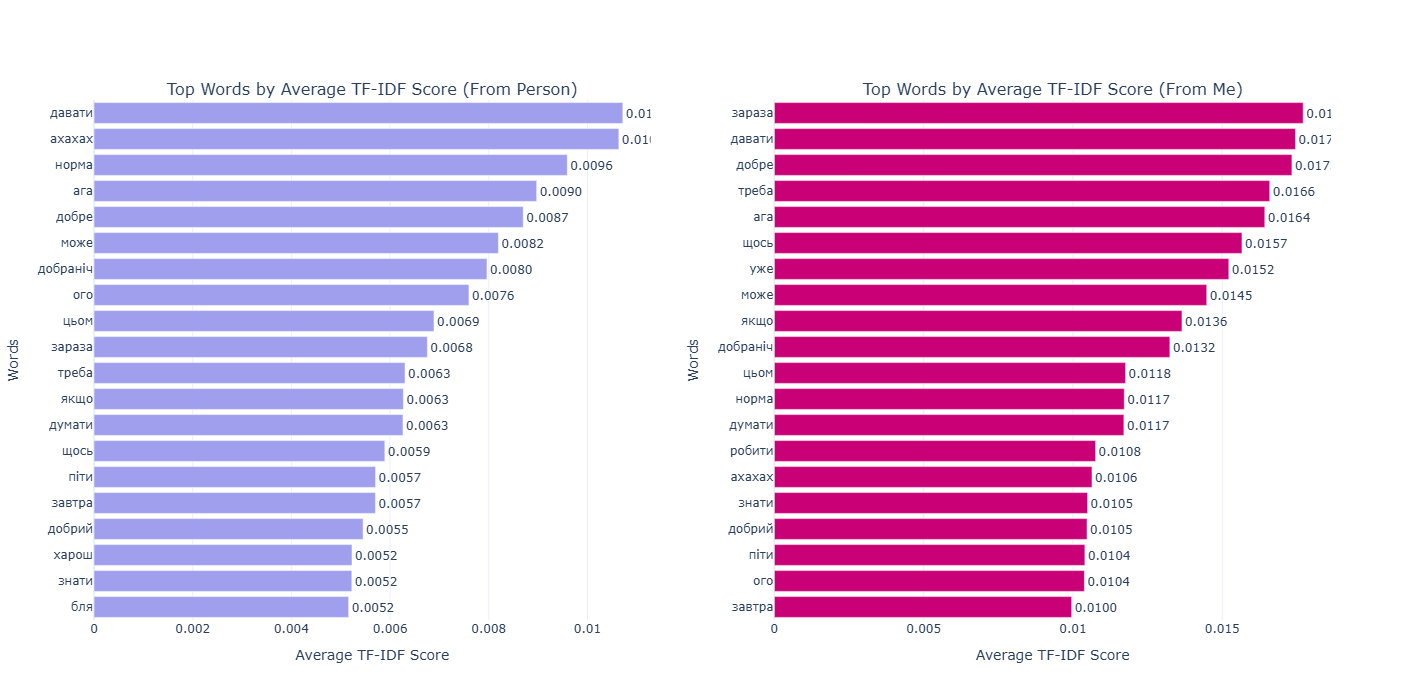

In [103]:
top_tfidf_words = top_tfidf_df.iloc[1:21]
top_tfidf_words = top_tfidf_words.sort_values(by='Average TF-IDF', ascending=True)

fig1 = go.Bar(
    x=top_tfidf_words['Average TF-IDF'],
    y=top_tfidf_words['Word'],
    orientation='h',
    marker_color='#9F9FED',
    text=top_tfidf_words['Average TF-IDF'],
    texttemplate='%{text:.4f}',
    textposition='outside',
    name='From Person'
)

top_tfidf_words_1 = top_tfidf_df_1.iloc[1:21]
top_tfidf_words_1 = top_tfidf_words_1.sort_values(by='Average TF-IDF', ascending=True)

fig2 = go.Bar(
    x=top_tfidf_words_1['Average TF-IDF'],
    y=top_tfidf_words_1['Word'],
    orientation='h',
    marker_color='#c90076',
    text=top_tfidf_words_1['Average TF-IDF'],
    texttemplate='%{text:.4f}',
    textposition='outside',
    name='From Me'
)

fig = make_subplots(
    rows=1,
    cols=2,
    shared_yaxes=False,
    subplot_titles=(
        "Top Words by Average TF-IDF Score (From Person)",
        "Top Words by Average TF-IDF Score (From Me)"
    ),
)

fig.add_trace(fig1, row=1, col=1)
fig.add_trace(fig2, row=1, col=2)

fig.update_layout(
    template='plotly_white',
    title_font=dict(size=18),
    title_x=0.5,
    height=700,
    width=1400,
    showlegend=False
)

# Update axes titles
fig.update_xaxes(title_text="Average TF-IDF Score", row=1, col=1)
fig.update_xaxes(title_text="Average TF-IDF Score", row=1, col=2)
fig.update_yaxes(title_text="Words", row=1, col=1)
fig.update_yaxes(title_text="Words", row=1, col=2)

fig.show()

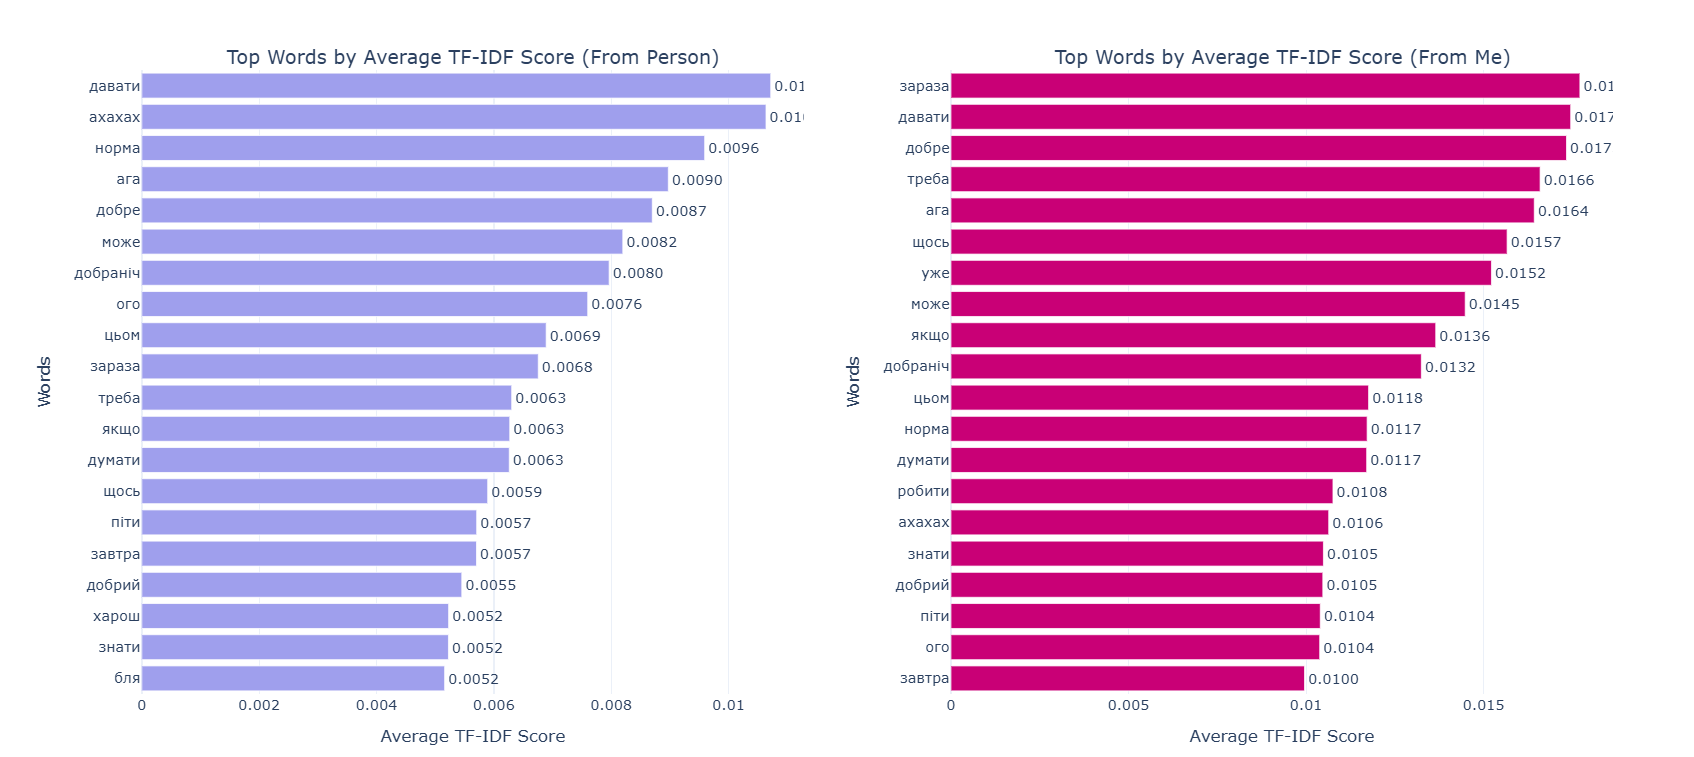

The visualizations highlight the most significant words based on their average TF-IDF scores in private chat messages. The left chart shows words predominantly used by the other person in the conversation, while the right chart focuses on my own word usage. This makes it very easy to observe **the similarities and differences** in our communication patterns.

### Thanks for reading! 🎀